# Extracting Data from Mysql

In [1]:
#!pip install pymysql
#!pip install mysql-connector

In [2]:
#!pip3 install ipython-sql

In [3]:
import os
import mysql.connector
import pandas as pd
import numpy as np

In [4]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&')

In [5]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_telecom',)


In [6]:
## connecting the database
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&',
                                  database='project_telecom')

In [7]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

U:\Users\UK\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


  Tables_in_project_telecom
0        telecom_churn_data


In [8]:
query = "select * from telecom_churn_data" 
output = pd.read_sql(query,connection)
print(output.shape)
output

U:\Users\UK\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(4617, 21)


columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
0          KS      128      415   382-4657       no      yes       25   
1          OH      107      415   371-7191       no      yes       26   
2          NJ      137      415   358-1921       no       no        0   
3          OH       84      408   375-9999      yes       no        0   
4          OK       75      415   330-6626      yes       no        0   
...       ...      ...      ...        ...      ...      ...      ...   
4612       NY       57      510   345-7512       no      yes       25   
4613       NM      177      408   343-6820       no      yes       29   
4614       VT       67      408   338-4794       no      yes       33   
4615       MI       98      415   355-8388       no      yes       23   
4616       IN      140      415   409-6884       no       no        0   

     columns8 columns9 columns10  ... columns12 columns13 columns14 columns15  \
0       265.1      110     45.07  ...        99     16.78     244.7        91   
1       161.6      123     27.47  ...       103     16.62     254.4       103   
2       243.4      114     41.38  ...       110      10.3     162.6       104   
3       299.4       71      50.9  ...        88      5.26     196.9        89   
4       166.7      113     28.34  ...       122     12.61     186.9       121   
...       ...      ...       ...  ...       ...       ...       ...       ...   
4612      144       81     24.48  ...       112     15.91     158.6       122   
4613      189       91     32.13  ...        96     25.76     163.6       116   
4614    127.5      126     21.68  ...       129     25.17     200.9        91   
4615    168.9       98     28.71  ...       117     19.24     165.5        96   
4616    204.7      100      34.8  ...       107     10.78     202.8       115   

     columns16 columns17 columns18 columns19 columns20 columns21  
0        11.01        10         3       2.7         1    False.  
1        11.45      13.7         3       3.7         1    False.  
2         7.32      12.2         5      3.29         0    False.  
3         8.86       6.6         7      1.78         2    False.  
4         8.41      10.1         3      2.73         3    False.  
...        ...       ...       ...       ...       ...       ...  
4612      7.14       8.5         6       2.3         3    False.  
4613      7.36      15.7         1      4.24         3    False.  
4614      9.04        13         3      3.51         1    False.  
4615      7.45      14.3         3      3.86         0    False.  
4616      9.13      12.1         4      3.27         2    False.  

[4617 rows x 21 columns]

In [9]:
# Renaming Columns
output.columns.values[0:21] =["State", "Account Length","Area Code","Phone","International Plan",
                              "VMail Plan","VMail Message","Day Mins","Day Calls","Day Charge",
                              "Eve Mins","Eve Calls","Eve Charge","Night Mins","Night Calls","Night Charge",
                              "International Mins","International calls","International Charge",
                              "CustServ Calls","Churn"]
output

State Account Length Area Code      Phone International Plan VMail Plan  \
0       KS            128       415   382-4657                 no        yes   
1       OH            107       415   371-7191                 no        yes   
2       NJ            137       415   358-1921                 no         no   
3       OH             84       408   375-9999                yes         no   
4       OK             75       415   330-6626                yes         no   
...    ...            ...       ...        ...                ...        ...   
4612    NY             57       510   345-7512                 no        yes   
4613    NM            177       408   343-6820                 no        yes   
4614    VT             67       408   338-4794                 no        yes   
4615    MI             98       415   355-8388                 no        yes   
4616    IN            140       415   409-6884                 no         no   

     VMail Message Day Mins Day Calls Day Charge  ... Eve Calls Eve Charge  \
0               25    265.1       110      45.07  ...        99      16.78   
1               26    161.6       123      27.47  ...       103      16.62   
2                0    243.4       114      41.38  ...       110       10.3   
3                0    299.4        71       50.9  ...        88       5.26   
4                0    166.7       113      28.34  ...       122      12.61   
...            ...      ...       ...        ...  ...       ...        ...   
4612            25      144        81      24.48  ...       112      15.91   
4613            29      189        91      32.13  ...        96      25.76   
4614            33    127.5       126      21.68  ...       129      25.17   
4615            23    168.9        98      28.71  ...       117      19.24   
4616             0    204.7       100       34.8  ...       107      10.78   

     Night Mins Night Calls Night Charge International Mins  \
0         244.7          91        11.01                 10   
1         254.4         103        11.45               13.7   
2         162.6         104         7.32               12.2   
3         196.9          89         8.86                6.6   
4         186.9         121         8.41               10.1   
...         ...         ...          ...                ...   
4612      158.6         122         7.14                8.5   
4613      163.6         116         7.36               15.7   
4614      200.9          91         9.04                 13   
4615      165.5          96         7.45               14.3   
4616      202.8         115         9.13               12.1   

     International calls International Charge CustServ Calls    Churn  
0                      3                  2.7              1   False.  
1                      3                  3.7              1   False.  
2                      5                 3.29              0   False.  
3                      7                 1.78              2   False.  
4                      3                 2.73              3   False.  
...                  ...                  ...            ...      ...  
4612                   6                  2.3              3   False.  
4613                   1                 4.24              3   False.  
4614                   3                 3.51              1   False.  
4615                   3                 3.86              0   False.  
4616                   4                 3.27              2   False.  

[4617 rows x 21 columns]

In [10]:
# Saving database tables in the system
output.to_csv('Telecom_Churn.csv')

# Importing Libraries and loading data

In [11]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Loading Data
data = pd.read_csv('Telecom_Churn.csv')

In [13]:
data

Unnamed: 0 State  Account Length  Area Code      Phone  \
0              0    KS             128        415   382-4657   
1              1    OH             107        415   371-7191   
2              2    NJ             137        415   358-1921   
3              3    OH              84        408   375-9999   
4              4    OK              75        415   330-6626   
...          ...   ...             ...        ...        ...   
4612        4612    NY              57        510   345-7512   
4613        4613    NM             177        408   343-6820   
4614        4614    VT              67        408   338-4794   
4615        4615    MI              98        415   355-8388   
4616        4616    IN             140        415   409-6884   

     International Plan VMail Plan  VMail Message  Day Mins  Day Calls  ...  \
0                    no        yes             25     265.1        110  ...   
1                    no        yes             26     161.6        123  ...   
2                    no         no              0     243.4        114  ...   
3                   yes         no              0     299.4         71  ...   
4                   yes         no              0     166.7        113  ...   
...                 ...        ...            ...       ...        ...  ...   
4612                 no        yes             25     144.0         81  ...   
4613                 no        yes             29     189.0         91  ...   
4614                 no        yes             33     127.5        126  ...   
4615                 no        yes             23     168.9         98  ...   
4616                 no         no              0     204.7        100  ...   

      Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4612        112       15.91       158.6          122          7.14   
4613         96       25.76       163.6          116          7.36   
4614        129       25.17       200.9           91          9.04   
4615        117       19.24       165.5           96          7.45   
4616        107       10.78       202.8          115          9.13   

      International Mins  International calls  International Charge  \
0                   10.0                    3                  2.70   
1                   13.7                    3                  3.70   
2                   12.2                    5                  3.29   
3                    6.6                    7                  1.78   
4                   10.1                    3                  2.73   
...                  ...                  ...                   ...   
4612                 8.5                    6                  2.30   
4613                15.7                    1                  4.24   
4614                13.0                    3                  3.51   
4615                14.3                    3                  3.86   
4616                12.1                    4                  3.27   

      CustServ Calls    Churn  
0                  1   False.  
1                  1   False.  
2                  0   False.  
3                  2   False.  
4                  3   False.  
...              ...      ...  
4612               3   False.  
4613               3   False.  
4614               1   False.  
4615               0   False.  
4616               2   False.  

[4617 rows x 22 columns]

In [14]:
# Removing Unwanted Column 
data.drop(['Unnamed: 0'],axis= 1,inplace= True)

In [15]:
data

State  Account Length  Area Code      Phone International Plan  \
0       KS             128        415   382-4657                 no   
1       OH             107        415   371-7191                 no   
2       NJ             137        415   358-1921                 no   
3       OH              84        408   375-9999                yes   
4       OK              75        415   330-6626                yes   
...    ...             ...        ...        ...                ...   
4612    NY              57        510   345-7512                 no   
4613    NM             177        408   343-6820                 no   
4614    VT              67        408   338-4794                 no   
4615    MI              98        415   355-8388                 no   
4616    IN             140        415   409-6884                 no   

     VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  ...  \
0           yes             25     265.1        110       45.07  ...   
1           yes             26     161.6        123       27.47  ...   
2            no              0     243.4        114       41.38  ...   
3            no              0     299.4         71       50.90  ...   
4            no              0     166.7        113       28.34  ...   
...         ...            ...       ...        ...         ...  ...   
4612        yes             25     144.0         81       24.48  ...   
4613        yes             29     189.0         91       32.13  ...   
4614        yes             33     127.5        126       21.68  ...   
4615        yes             23     168.9         98       28.71  ...   
4616         no              0     204.7        100       34.80  ...   

      Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4612        112       15.91       158.6          122          7.14   
4613         96       25.76       163.6          116          7.36   
4614        129       25.17       200.9           91          9.04   
4615        117       19.24       165.5           96          7.45   
4616        107       10.78       202.8          115          9.13   

      International Mins  International calls  International Charge  \
0                   10.0                    3                  2.70   
1                   13.7                    3                  3.70   
2                   12.2                    5                  3.29   
3                    6.6                    7                  1.78   
4                   10.1                    3                  2.73   
...                  ...                  ...                   ...   
4612                 8.5                    6                  2.30   
4613                15.7                    1                  4.24   
4614                13.0                    3                  3.51   
4615                14.3                    3                  3.86   
4616                12.1                    4                  3.27   

      CustServ Calls    Churn  
0                  1   False.  
1                  1   False.  
2                  0   False.  
3                  2   False.  
4                  3   False.  
...              ...      ...  
4612               3   False.  
4613               3   False.  
4614               1   False.  
4615               0   False.  
4616               2   False.  

[4617 rows x 21 columns]

## Domain Analysis

State: 51 Unique States name

Account Length: Length of The Account

Area Code: Code Number of Area having some States

International Plan: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

Voice Mall Plan: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages: Number of Voice Mail Messages ranging from 0 to 50 

Total day minutes: Total Number of Minutes Spent in Morning

Total day calls: Total Number of Calls made in Morning.

Total day charge: Total Charge to the Customers in Morning

Total eve minutes: Total Number of Minutes Spent in Evening 

Total eve calls: Total Number of Calls made in Evening

Total eve charge: Total Charge to the Customers in Morning.

Total night minutes: Total Number of Minutes Spent in the Night

Total night calls: Total Number of Calls made in Night

Total night charge: Total Charge to the Customers in Night Customer service calls Number of customer service calls made by customer

Churn: Customer Churn, True means churned customer, False means retained customer

## Basic Checks

In [16]:
data.head()

State  Account Length  Area Code      Phone International Plan VMail Plan  \
0    KS             128        415   382-4657                 no        yes   
1    OH             107        415   371-7191                 no        yes   
2    NJ             137        415   358-1921                 no         no   
3    OH              84        408   375-9999                yes         no   
4    OK              75        415   330-6626                yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  International Mins  \
0       244.7           91         11.01                10.0   
1       254.4          103         11.45                13.7   
2       162.6          104          7.32                12.2   
3       196.9           89          8.86                 6.6   
4       186.9          121          8.41                10.1   

   International calls  International Charge  CustServ Calls    Churn  
0                    3                  2.70               1   False.  
1                    3                  3.70               1   False.  
2                    5                  3.29               0   False.  
3                    7                  1.78               2   False.  
4                    3                  2.73               3   False.  

[5 rows x 21 columns]

In [17]:
data.tail()

State  Account Length  Area Code      Phone International Plan  \
4612    NY              57        510   345-7512                 no   
4613    NM             177        408   343-6820                 no   
4614    VT              67        408   338-4794                 no   
4615    MI              98        415   355-8388                 no   
4616    IN             140        415   409-6884                 no   

     VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  ...  \
4612        yes             25     144.0         81       24.48  ...   
4613        yes             29     189.0         91       32.13  ...   
4614        yes             33     127.5        126       21.68  ...   
4615        yes             23     168.9         98       28.71  ...   
4616         no              0     204.7        100       34.80  ...   

      Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
4612        112       15.91       158.6          122          7.14   
4613         96       25.76       163.6          116          7.36   
4614        129       25.17       200.9           91          9.04   
4615        117       19.24       165.5           96          7.45   
4616        107       10.78       202.8          115          9.13   

      International Mins  International calls  International Charge  \
4612                 8.5                    6                  2.30   
4613                15.7                    1                  4.24   
4614                13.0                    3                  3.51   
4615                14.3                    3                  3.86   
4616                12.1                    4                  3.27   

      CustServ Calls    Churn  
4612               3   False.  
4613               3   False.  
4614               1   False.  
4615               0   False.  
4616               2   False.  

[5 rows x 21 columns]

In [18]:
data.shape

(4617, 21)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [20]:
data.describe().T

count        mean        std     min     25%     50%  \
Account Length        4617.0  100.645224  39.597194    1.00   74.00  100.00   
Area Code             4617.0  437.046350  42.288212  408.00  408.00  415.00   
VMail Message         4617.0    7.849903  13.592333    0.00    0.00    0.00   
Day Mins              4617.0  180.447152  53.983540    0.00  143.70  180.00   
Day Calls             4617.0  100.054364  19.883027    0.00   87.00  100.00   
Day Charge            4617.0   30.676576   9.177145    0.00   24.43   30.60   
Eve Mins              4617.0  200.429088  50.557001    0.00  165.90  200.80   
Eve Calls             4617.0  100.179770  19.821314    0.00   87.00  101.00   
Eve Charge            4617.0   17.036703   4.297332    0.00   14.10   17.07   
Night Mins            4617.0  200.623933  50.543616   23.20  167.10  200.80   
Night Calls           4617.0   99.944120  19.935053   12.00   87.00  100.00   
Night Charge          4617.0    9.028185   2.274488    1.04    7.52    9.04   
International Mins    4617.0   10.279294   2.757361    0.00    8.60   10.30   
International calls   4617.0    4.433831   2.457615    0.00    3.00    4.00   
International Charge  4617.0    2.775926   0.744413    0.00    2.32    2.78   
CustServ Calls        4617.0    1.567035   1.307019    0.00    1.00    1.00   

                         75%     max  
Account Length        127.00  243.00  
Area Code             510.00  510.00  
VMail Message          17.00   51.00  
Day Mins              216.80  351.50  
Day Calls             113.00  165.00  
Day Charge             36.86   59.76  
Eve Mins              234.00  363.70  
Eve Calls             114.00  170.00  
Eve Charge             19.89   30.91  
Night Mins            234.90  395.00  
Night Calls           113.00  175.00  
Night Charge           10.57   17.77  
International Mins     12.10   20.00  
International calls     6.00   20.00  
International Charge    3.27    5.40  
CustServ Calls          2.00    9.00

In [21]:
data.nunique()

State                     51
Account Length           218
Area Code                  3
Phone                   4617
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International calls       21
International Charge     168
CustServ Calls            10
Churn                      2
dtype: int64

In [22]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [23]:
data.Churn.value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

## checking for missing and duplicate values 

In [24]:
data.isna().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [25]:
len(data[data.duplicated()])

0

## Data Visualization

   ## Univariate Analysis

In [26]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis

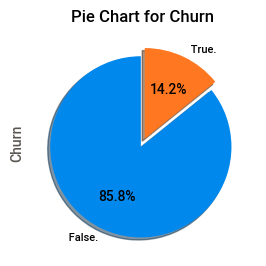

In [27]:
data['Churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', startangle=90,shadow=True,figsize=(3,3))
plt.title('Pie Chart for Churn')
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

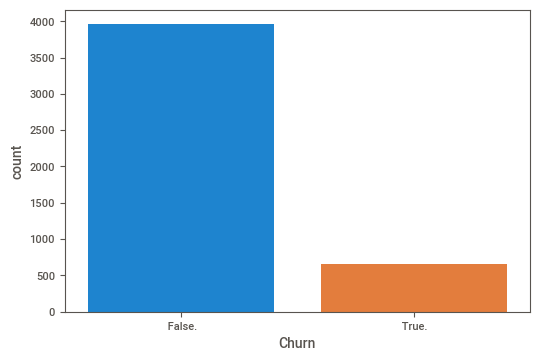

In [28]:
sns.countplot(x=data.Churn)

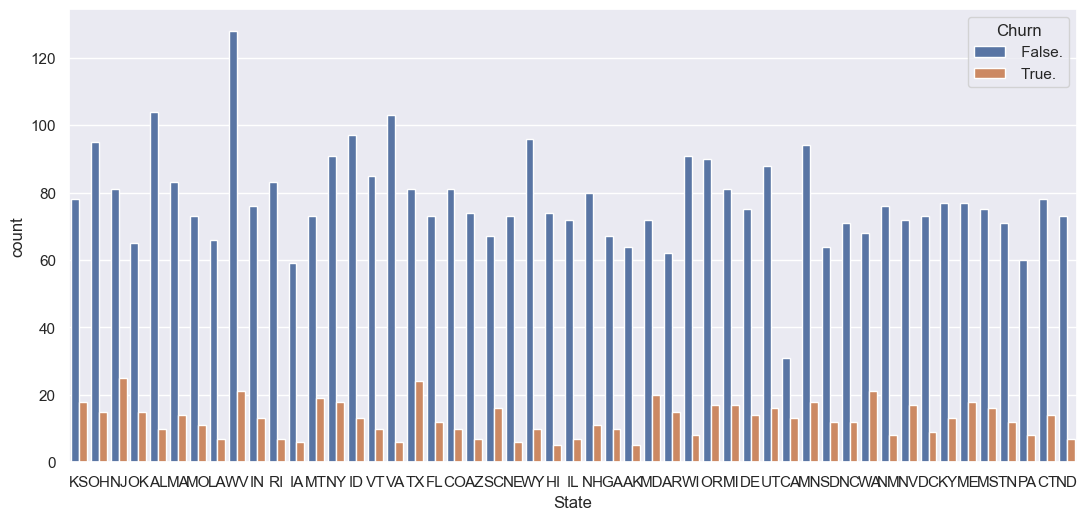

In [29]:
sns.set(style='darkgrid')
plt.figure(figsize=(13,6))
ax = sns.countplot(x='State',hue='Churn',data=data)
plt.show() 

In [30]:
data['International Plan'].value_counts()

 no     4171
 yes     446
Name: International Plan, dtype: int64

<AxesSubplot:xlabel='International Plan', ylabel='count'>

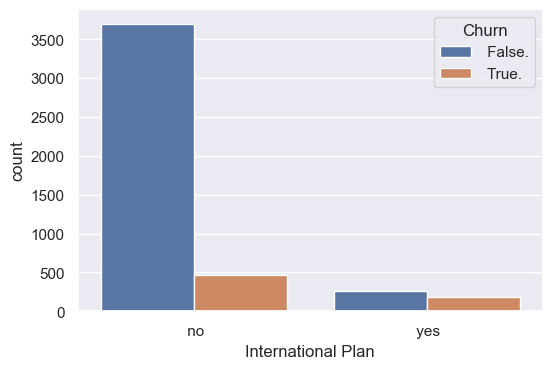

In [31]:
sns.countplot(x='International Plan',hue='Churn',data = data) 

In [32]:
churn_df=data[data['Churn']==bool(True)] #seperating churn and non churn values
not_churn_df=data[data['Churn']==bool(False)]  

<AxesSubplot:xlabel='Account Length', ylabel='Density'>

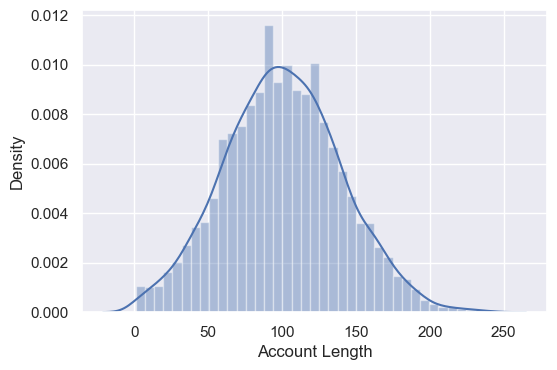

In [33]:
sns.distplot(data['Account Length']) 

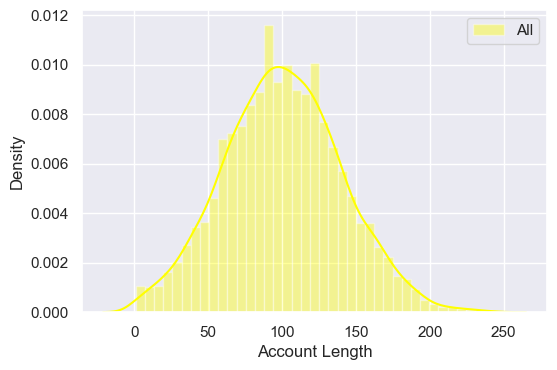

In [34]:
sns.distplot(data['Account Length'],color = 'yellow',label='All')
sns.distplot(churn_df['Account Length'],color = 'red',hist=False,label='Churned')
sns.distplot(not_churn_df['Account Length'],color = 'green',hist=False,label='Not Churned')
plt.legend()


In [35]:
contingency_table = pd.crosstab(data['VMail Plan'], data['Churn'])
print(contingency_table)

Churn        False.   True.
VMail Plan                 
 no            2822     559
 yes           1139      97


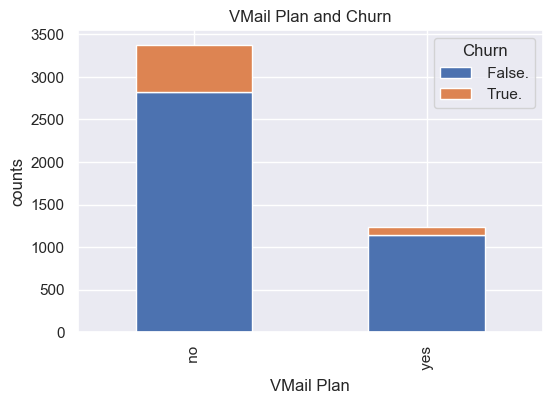

In [36]:
contingency_table.plot(kind='bar', stacked=True)
plt.title('VMail Plan and Churn')
plt.xlabel('VMail Plan')
plt.ylabel('counts')
plt.legend(title='Churn')
plt.show()

In [37]:
data['VMail Message'].value_counts()

0     3381
31      80
29      64
28      62
33      61
24      57
27      57
26      55
30      54
32      52
25      49
23      48
22      45
36      45
37      42
39      40
35      40
21      40
34      39
38      37
20      30
19      26
40      26
41      21
42      19
17      18
16      16
18      14
43      13
15      12
12      10
45      10
14       9
46       8
44       7
10       4
47       4
13       4
48       3
49       3
9        2
50       2
6        2
8        2
11       2
4        1
51       1
Name: VMail Message, dtype: int64

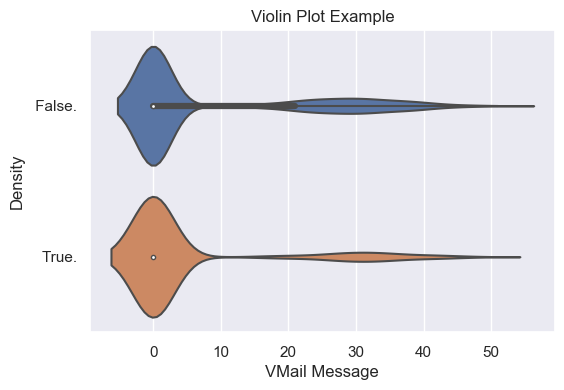

In [38]:
sns.violinplot(x='VMail Message', y='Churn', data=data)
plt.title('Violin Plot Example')
plt.xlabel('VMail Message')
plt.ylabel('Density')
plt.show()

In [39]:
data['CustServ Calls'].value_counts()

1    1651
2    1031
0     951
3     616
4     234
5      89
6      28
7      13
9       2
8       2
Name: CustServ Calls, dtype: int64

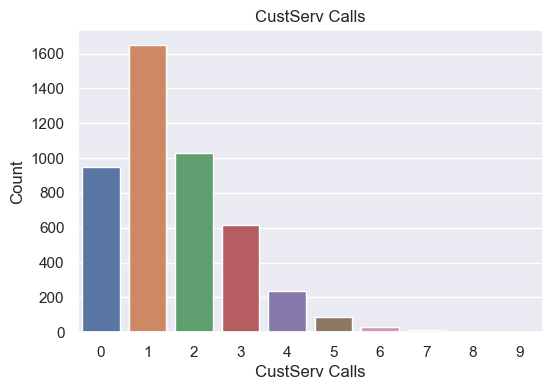

In [40]:
sns.countplot(x='CustServ Calls', data=data)
plt.title('CustServ Calls')
plt.xlabel('CustServ Calls')
plt.ylabel('Count')
plt.show()

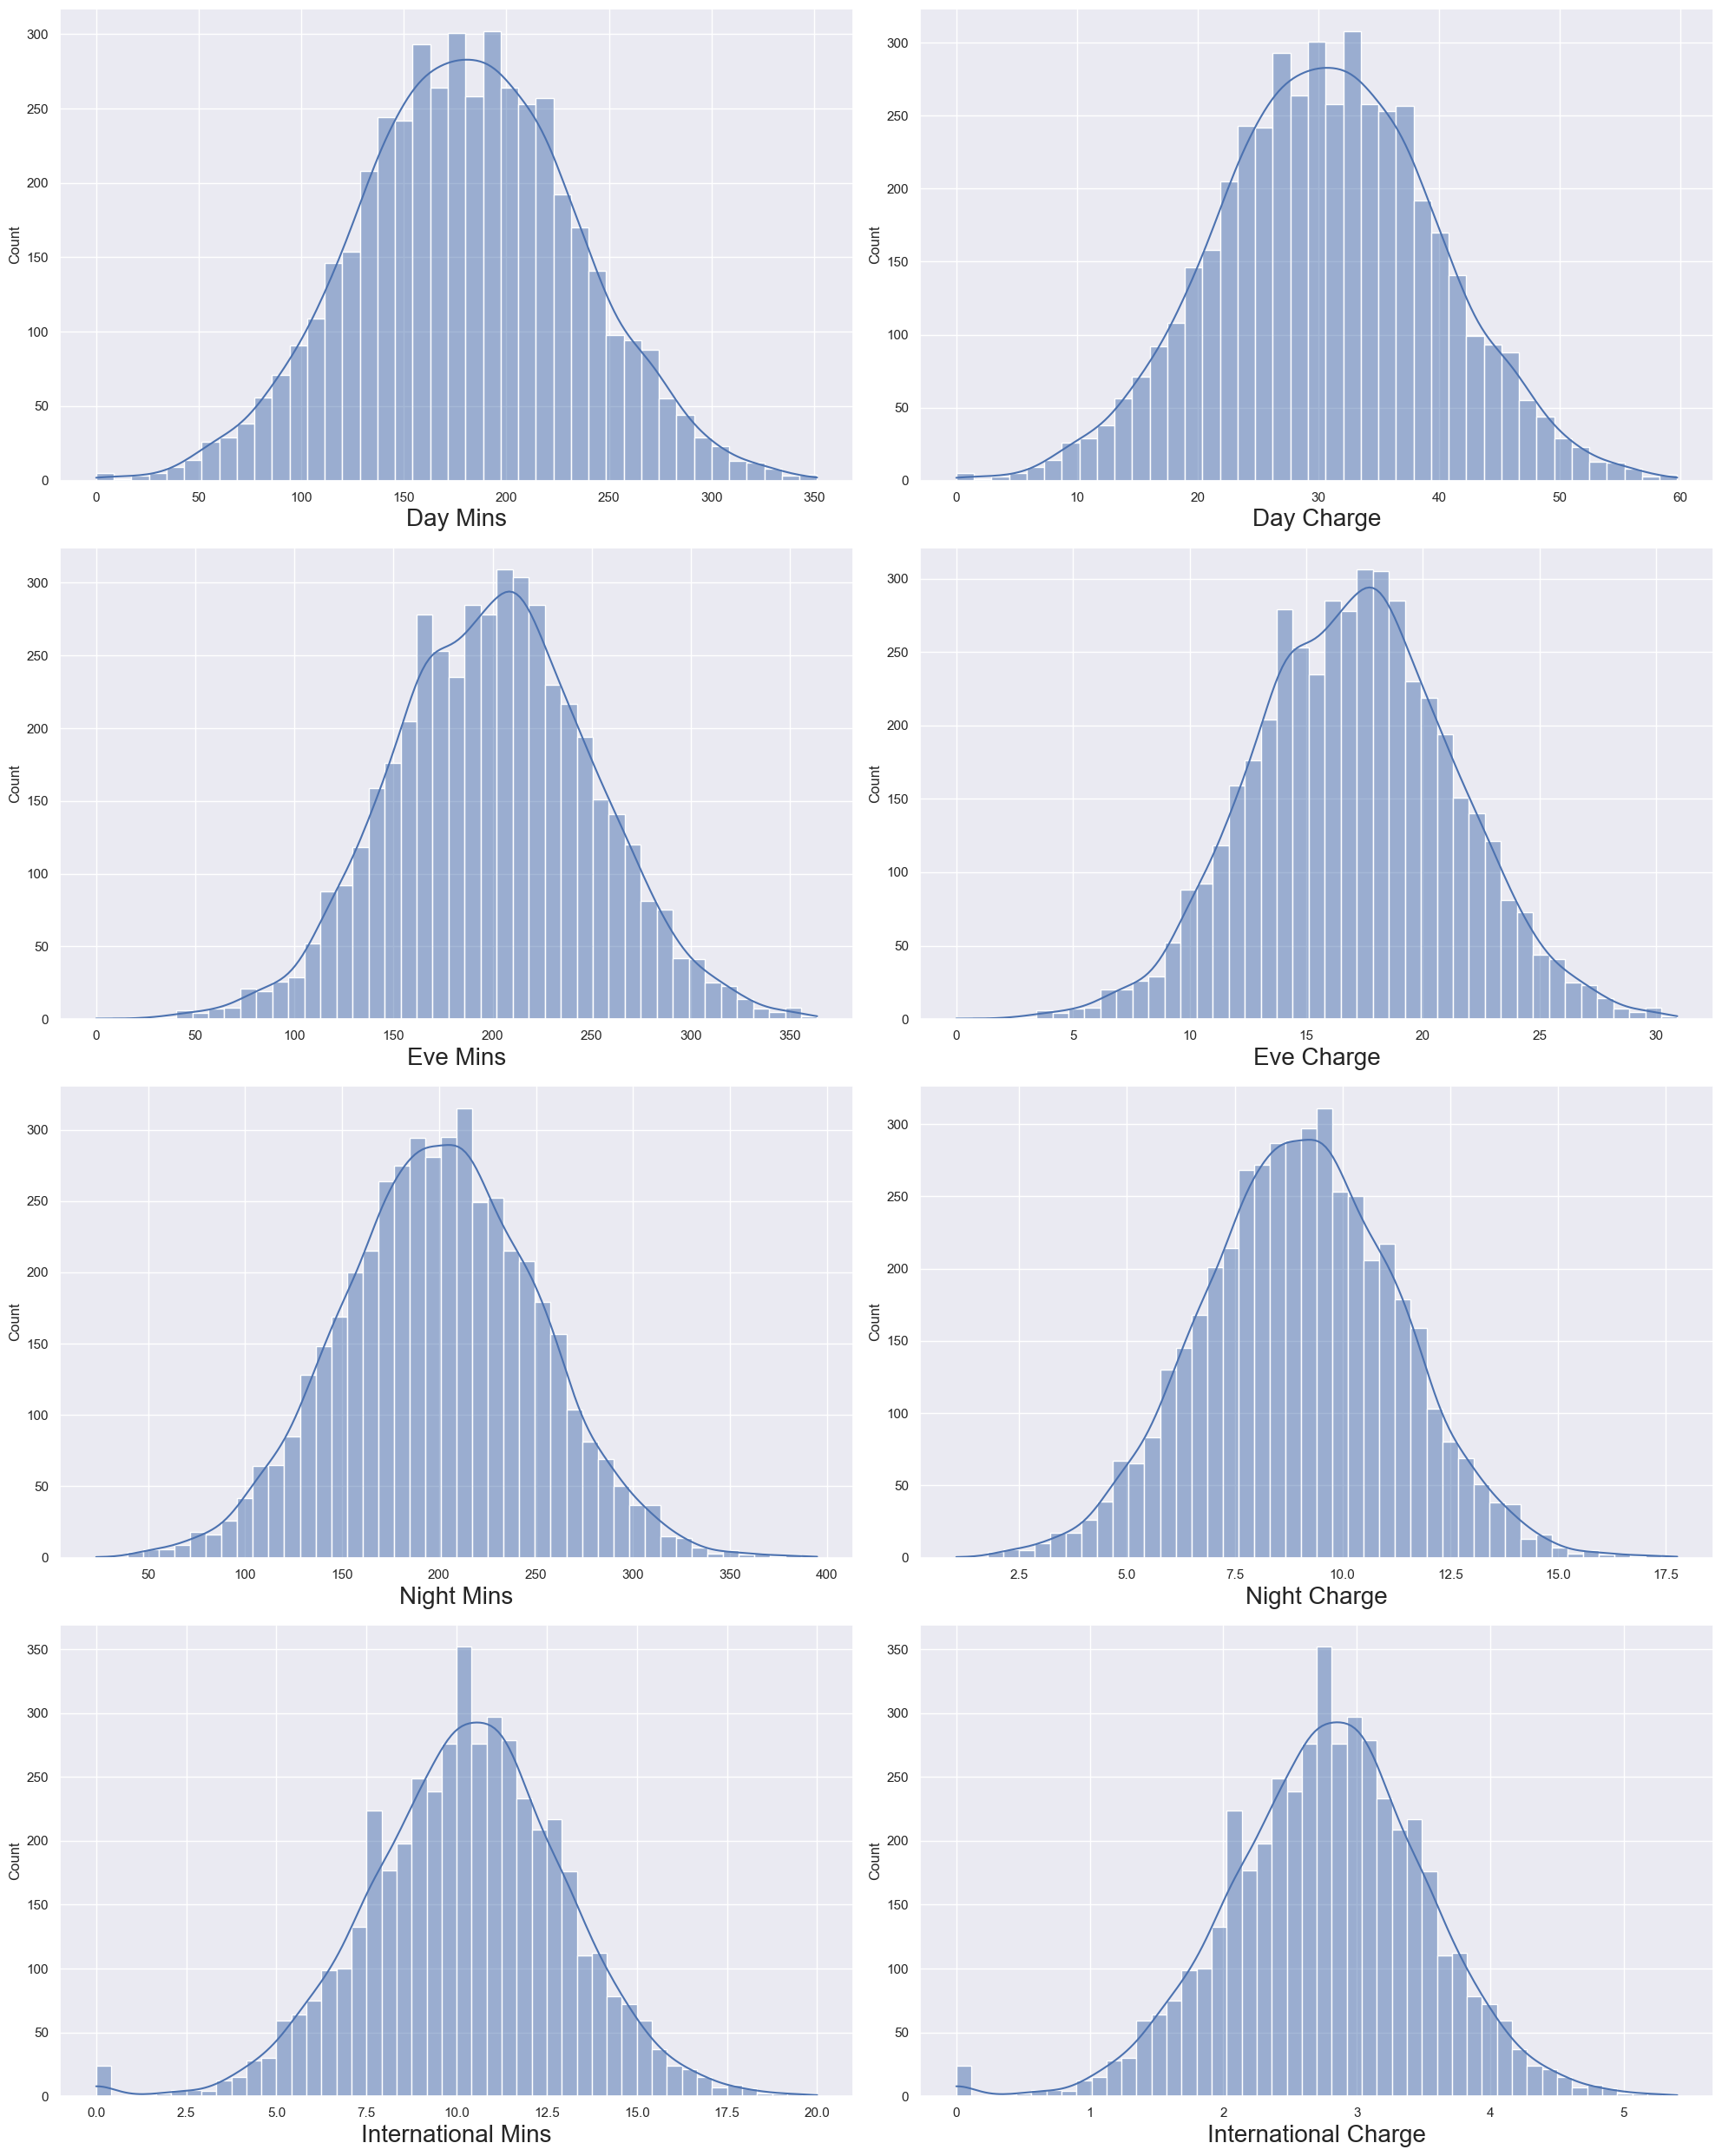

In [41]:
cols=data[['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins',
       'Night Charge', 'International Mins', 'International Charge']]

plotno=1
plt.figure(figsize=(20,25))

for column in cols:
    if plotno<=8:   
        plt.subplot(4,2,plotno)
        sns.histplot(x=cols[column],kde=True) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1
plt.tight_layout()
plt.show()

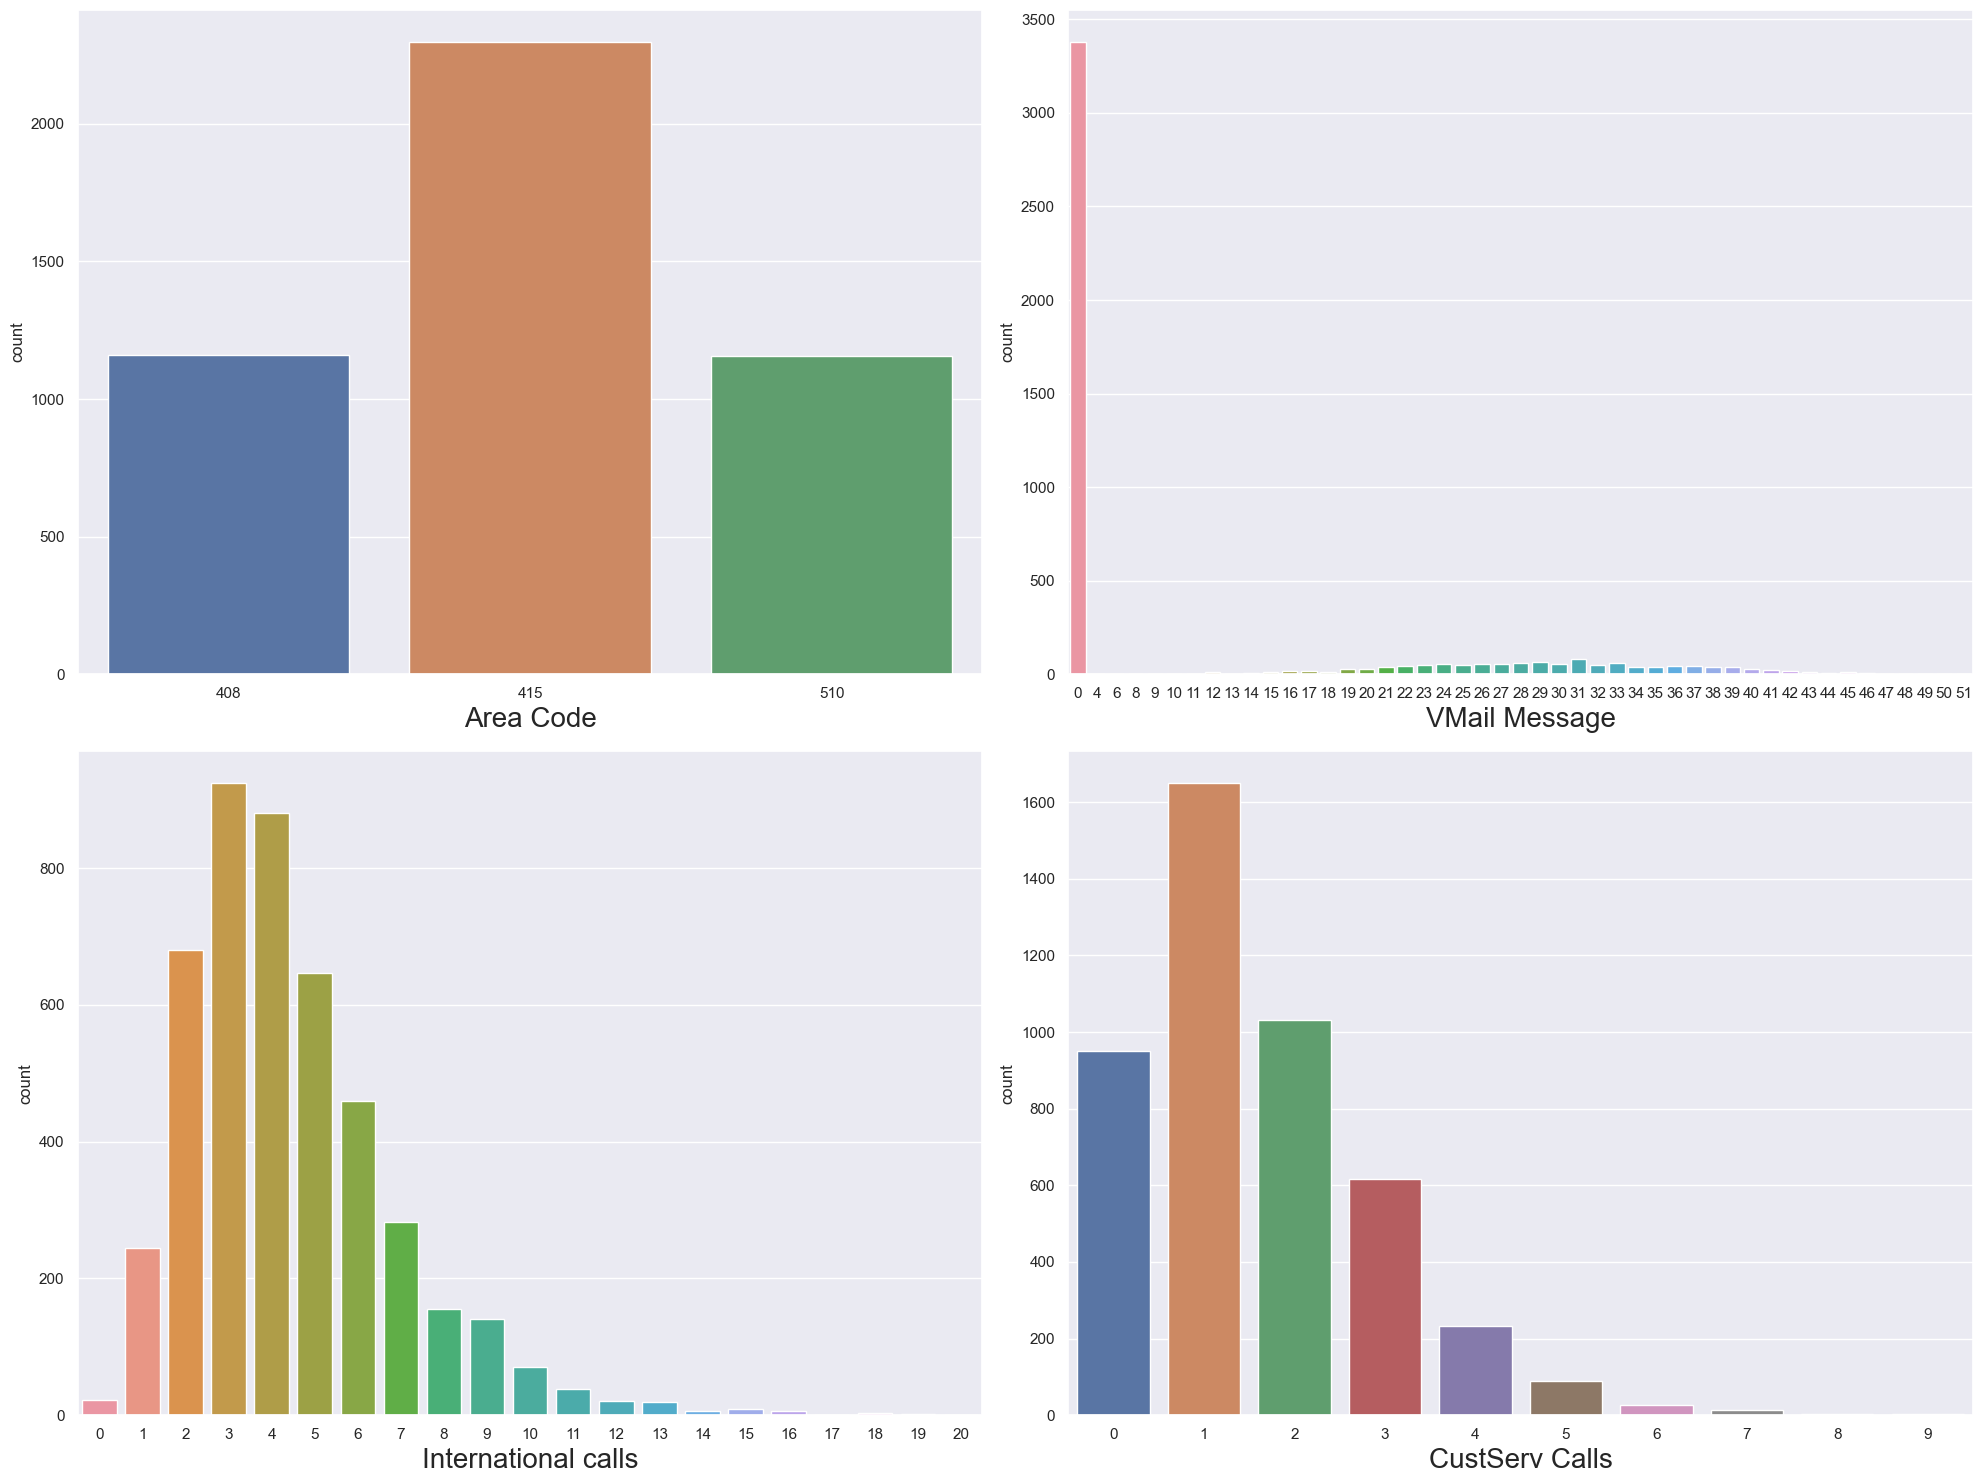

In [42]:
cols=data[[ 'Area Code', 'VMail Message', 'International calls', 'CustServ Calls']]

plotno=1
plt.figure(figsize=(20,15))

for column in cols:
    if plotno<=4:   
        plt.subplot(2,2,plotno)
        sns.countplot(x=cols[column]) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1
plt.tight_layout()
plt.show()

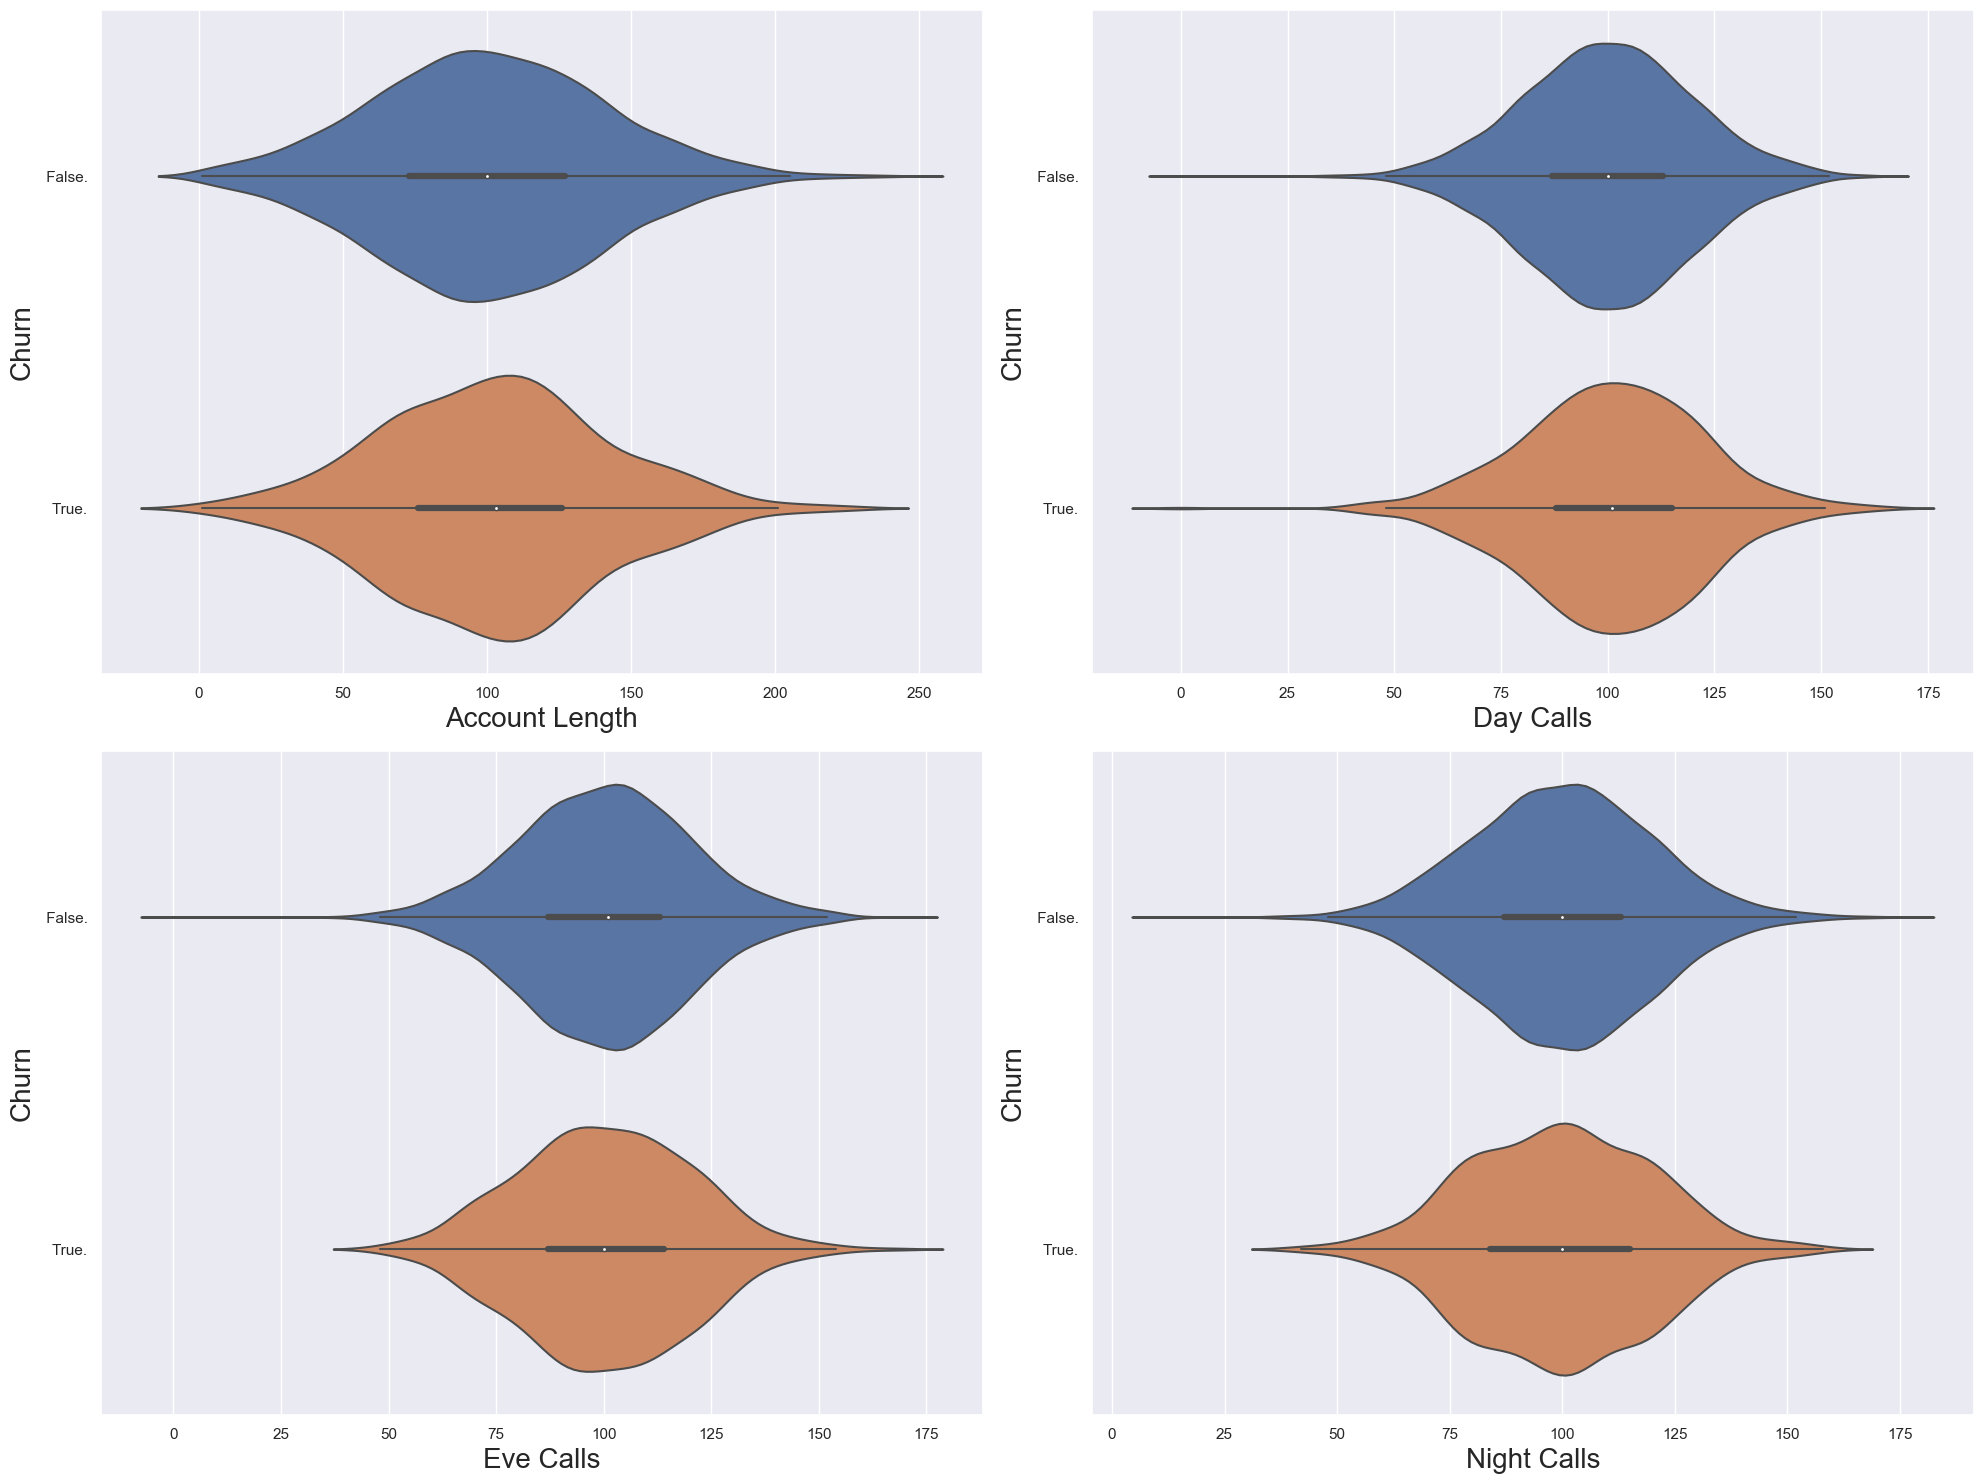

In [43]:
cols=data[['Account Length','Day Calls','Eve Calls', 'Night Calls']]

plotno=1
plt.figure(figsize=(20,15))

for column in cols:
    if plotno<=4:   
        plt.subplot(2,2,plotno)
        sns.violinplot(x=cols[column],y=data.Churn) 
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('Churn',fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

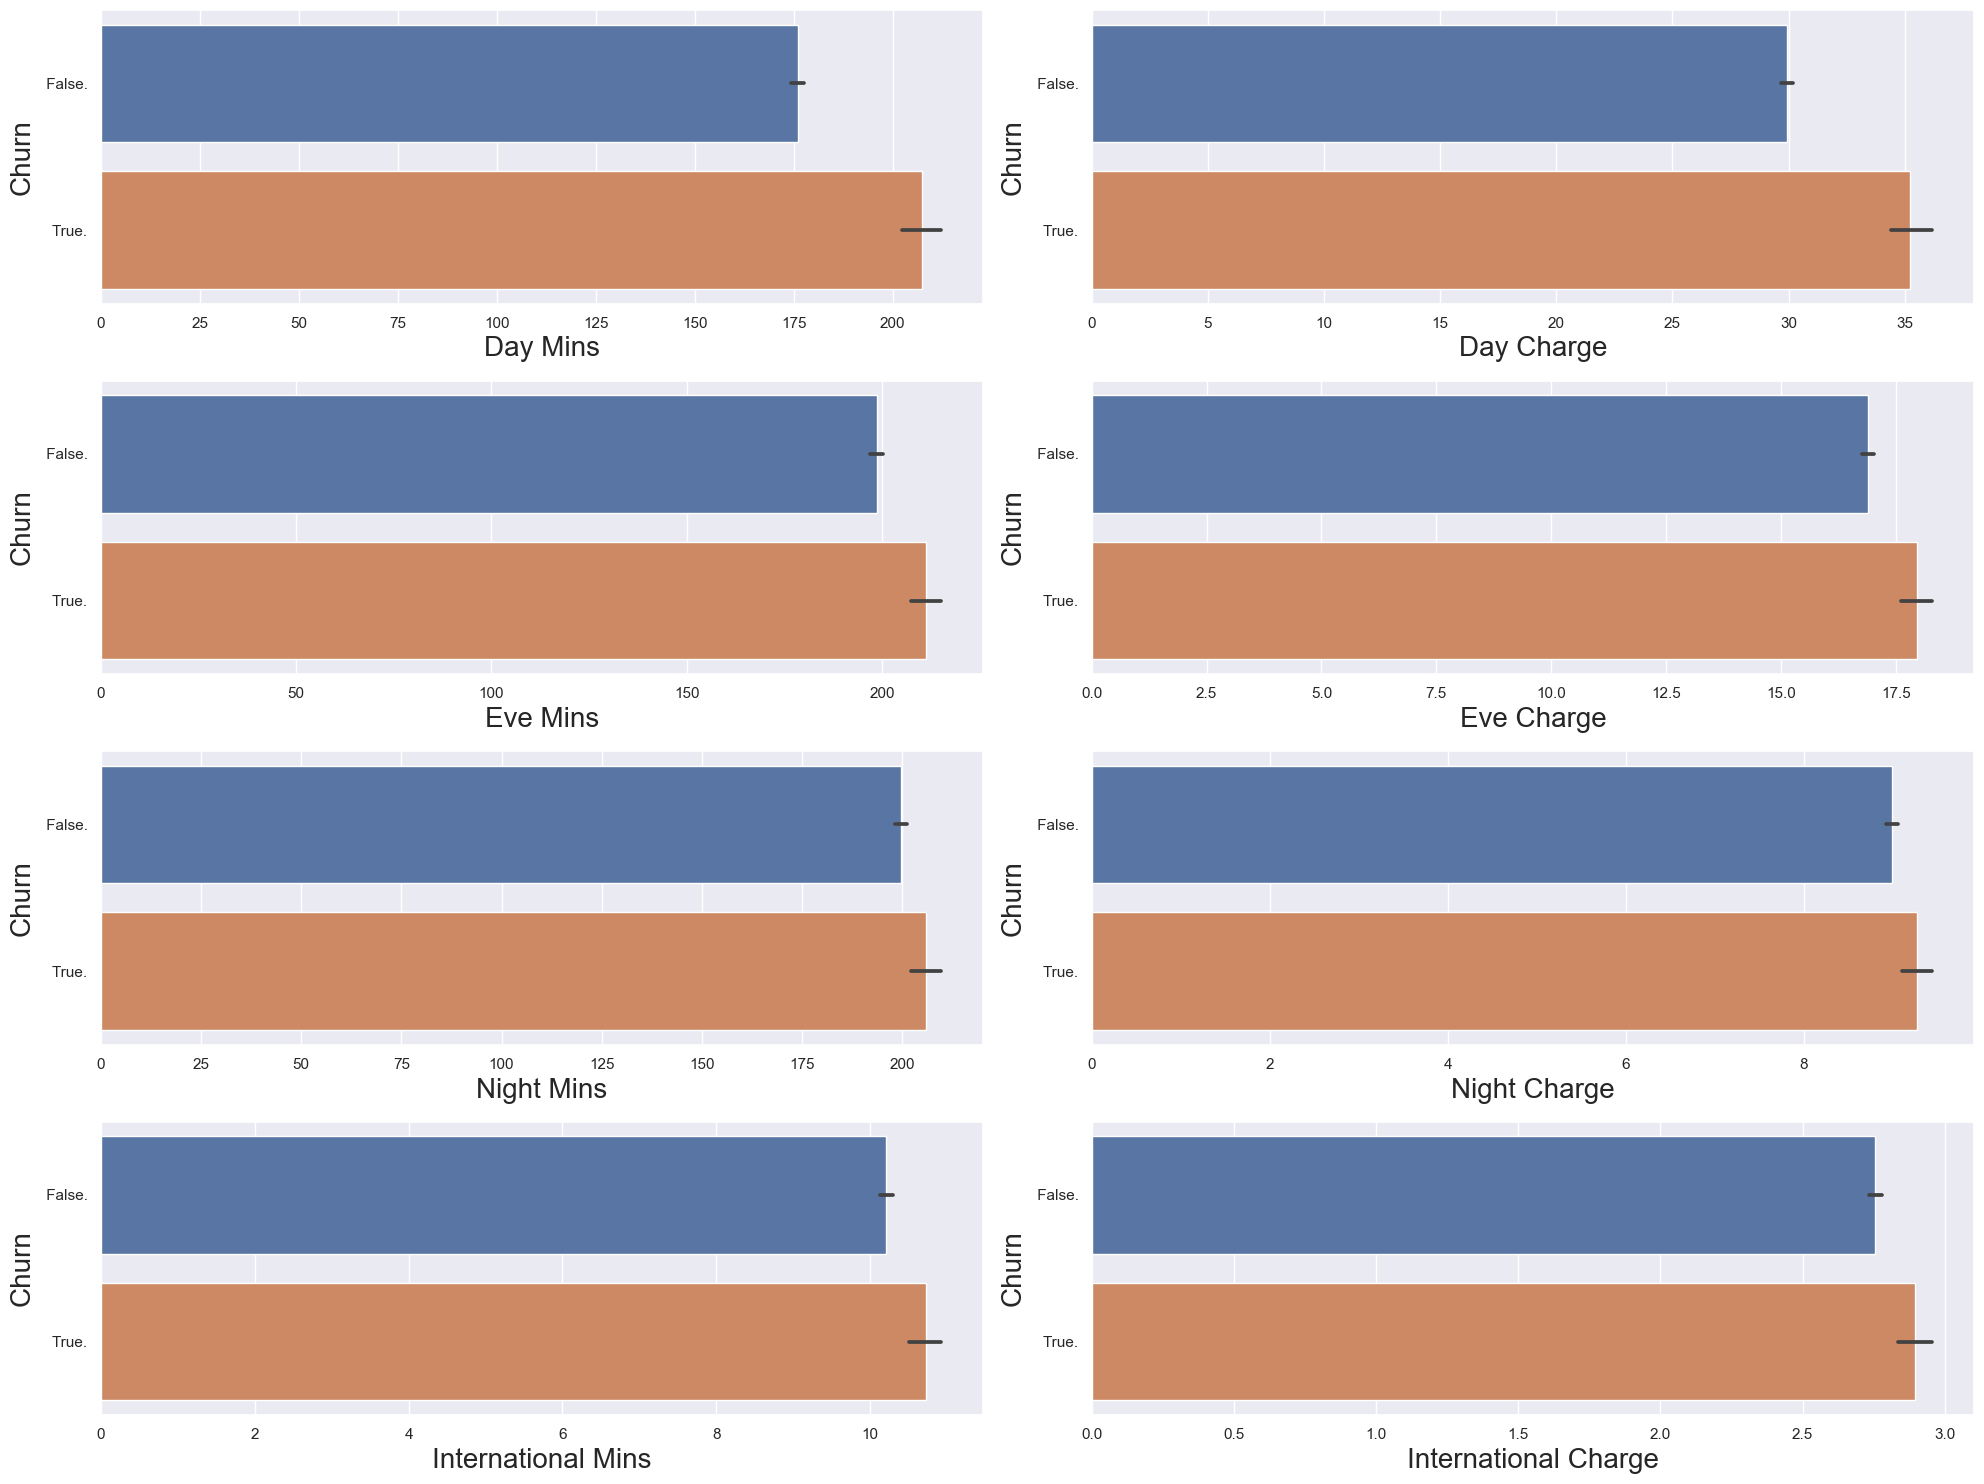

In [44]:
cols=data[['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins',
       'Night Charge', 'International Mins', 'International Charge']]

plotno=1
plt.figure(figsize=(20,15))

for column in cols:
    if plotno<=8:   
        plt.subplot(4,2,plotno)
        sns.barplot(x=cols[column],y=data.Churn) 
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('Churn',fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

### CONCLUSIONS:

After performing exploratory data analysis on the data set, this is what we have incurred from data:

There are some states where the churn rate is high as compared to others may be due to low network coverage.

Area code and Account length do not play any kind of role regarding the churn rate so,it's redundant data columns

In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge

In the voice mail section when there are more than 20 voice-mail messages then there is a churn so it basically means that the quality of voice mail is not good.

Total day call minutes, total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, these columns didn't play any kind of role regarding the churn rate.

In international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue.

In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.

## Finding relationship between Total Churn Rate and Churn Rate

In [45]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [46]:
data['Total_churn']=data['Day Charge']+data['Night Charge']+data['International calls']+data['Eve Charge']

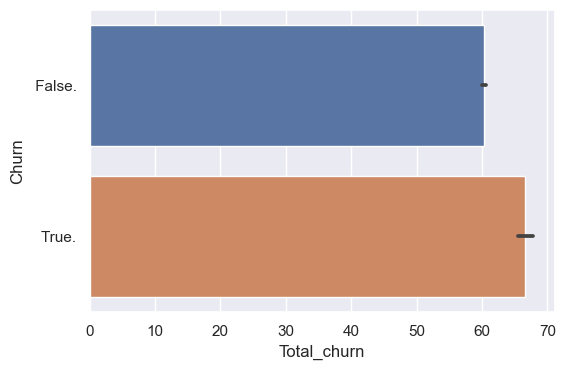

<Figure size 700x400 with 0 Axes>

In [47]:
sns.barplot(x='Total_churn',y='Churn',data=data)
plt.figure(figsize=(7,4))
plt.show()

### Checking for Skweness

In [48]:
print('1.Day Mins:',data['Day Mins'].skew())
print('2.Day Charge:',data['Day Charge'].skew())
print('3.Eve Mins:',data['Eve Mins'].skew())
print('4.Eve Charge:',data['Eve Charge'].skew())
print('5.Night Mins:',data['Night Mins'].skew())
print('6.Night Charge:',data['Night Charge'].skew())
print('7.International Mins:',data['International Mins'].skew())
print('8.International Charge',data['International Charge'].skew())
print('9.VMail Message:',data['VMail Message'].skew())
print('10.Day Calls:',data['Day Calls'].skew())
print('11.Eve Calls:',data['Eve Calls'].skew())
print('12.Night Calls:',data['Night Calls'].skew())
print('13.International calls:',data['International calls'].skew())
print('14.CustServ Calls:',data['CustServ Calls'].skew())

1.Day Mins: -0.0029482419465375036
2.Day Charge: -0.0029517678513436532
3.Eve Mins: -0.005279865595399793
4.Eve Charge: -0.005251817281542911
5.Night Mins: 0.020515079577235425
6.Night Charge: 0.020506979859122247
7.International Mins: -0.22089058032757028
8.International Charge -0.22134224932496707
9.VMail Message: 1.3267341276309796
10.Day Calls: -0.08101344941373215
11.Eve Calls: -0.017554064897175967
12.Night Calls: 0.03088630476887771
13.International calls: 1.3664196475875725
14.CustServ Calls: 1.0468003210064518


### Checking for Kurtosis

In [49]:
print('1.Day Mins:',data['Day Mins'].kurtosis())
print('2.Day Charge:',data['Day Charge'].kurtosis())
print('3.Eve Mins:',data['Eve Mins'].kurtosis())
print('4.Eve Charge:',data['Eve Charge'].kurtosis())
print('5.Night Mins:',data['Night Mins'].kurtosis())
print('6.Night Charge:',data['Night Charge'].kurtosis())
print('7.International Mins:',data['International Mins'].kurtosis())
print('8.International Charge',data['International Charge'].kurtosis())
print('9.VMail Message:',data['VMail Message'].kurtosis())
print('10.Day Calls:',data['Day Calls'].kurtosis())
print('11.Eve Calls:',data['Eve Calls'].kurtosis())
print('12.Night Calls:',data['Night Calls'].kurtosis())
print('13.International calls:',data['International calls'].kurtosis())
print('14.CustServ Calls:',data['CustServ Calls'].kurtosis())

1.Day Mins: -0.04239886448858643
2.Day Charge: -0.04226391328625123
3.Eve Mins: 0.04363015504023915
4.Eve Charge: 0.043521686375544544
5.Night Mins: 0.06140917833227322
6.Night Charge: 0.06138035035812539
7.International Mins: 0.6716019713259089
8.International Charge 0.6725178494936568
9.VMail Message: 0.12352608178115165
10.Day Calls: 0.19614676698037892
11.Eve Calls: 0.13598037730899604
12.Night Calls: 0.06881524905088021
13.International calls: 3.302927280426942
14.CustServ Calls: 1.515026394969627


### Converting the categorical data into numerical data using LabelEncoding

In [50]:
data

State  Account Length  Area Code      Phone International Plan  \
0       KS             128        415   382-4657                 no   
1       OH             107        415   371-7191                 no   
2       NJ             137        415   358-1921                 no   
3       OH              84        408   375-9999                yes   
4       OK              75        415   330-6626                yes   
...    ...             ...        ...        ...                ...   
4612    NY              57        510   345-7512                 no   
4613    NM             177        408   343-6820                 no   
4614    VT              67        408   338-4794                 no   
4615    MI              98        415   355-8388                 no   
4616    IN             140        415   409-6884                 no   

     VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  ...  \
0           yes             25     265.1        110       45.07  ...   
1           yes             26     161.6        123       27.47  ...   
2            no              0     243.4        114       41.38  ...   
3            no              0     299.4         71       50.90  ...   
4            no              0     166.7        113       28.34  ...   
...         ...            ...       ...        ...         ...  ...   
4612        yes             25     144.0         81       24.48  ...   
4613        yes             29     189.0         91       32.13  ...   
4614        yes             33     127.5        126       21.68  ...   
4615        yes             23     168.9         98       28.71  ...   
4616         no              0     204.7        100       34.80  ...   

      Eve Charge  Night Mins  Night Calls  Night Charge  International Mins  \
0          16.78       244.7           91         11.01                10.0   
1          16.62       254.4          103         11.45                13.7   
2          10.30       162.6          104          7.32                12.2   
3           5.26       196.9           89          8.86                 6.6   
4          12.61       186.9          121          8.41                10.1   
...          ...         ...          ...           ...                 ...   
4612       15.91       158.6          122          7.14                 8.5   
4613       25.76       163.6          116          7.36                15.7   
4614       25.17       200.9           91          9.04                13.0   
4615       19.24       165.5           96          7.45                14.3   
4616       10.78       202.8          115          9.13                12.1   

      International calls  International Charge  CustServ Calls    Churn  \
0                       3                  2.70               1   False.   
1                       3                  3.70               1   False.   
2                       5                  3.29               0   False.   
3                       7                  1.78               2   False.   
4                       3                  2.73               3   False.   
...                   ...                   ...             ...      ...   
4612                    6                  2.30               3   False.   
4613                    1                  4.24               3   False.   
4614                    3                  3.51               1   False.   
4615                    3                  3.86               0   False.   
4616                    4                  3.27               2   False.   

      Total_churn  
0           75.86  
1           58.54  
2           64.00  
3           72.02  
4           52.36  
...           ...  
4612        53.53  
4613        66.25  
4614        58.89  
4615        58.40  
4616        58.71  

[4617 rows x 22 columns]

In [51]:
data['VMail Plan'].value_counts()

 no     3381
 yes    1236
Name: VMail Plan, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['VMail Plan'] = le.fit_transform(data['VMail Plan'])

In [53]:
data['VMail Plan'].value_counts()

0    3381
1    1236
Name: VMail Plan, dtype: int64

In [54]:
data['International Plan'].value_counts()

 no     4171
 yes     446
Name: International Plan, dtype: int64

In [55]:
data['International Plan'] = le.fit_transform(data['International Plan'])

In [56]:
data['International Plan'].value_counts()

0    4171
1     446
Name: International Plan, dtype: int64

In [57]:
data['Churn'].value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

In [58]:
data['Churn']=le.fit_transform(data['Churn'])

In [59]:
data['Churn'].value_counts()

0    3961
1     656
Name: Churn, dtype: int64

### Checking and imputing for Outliers 

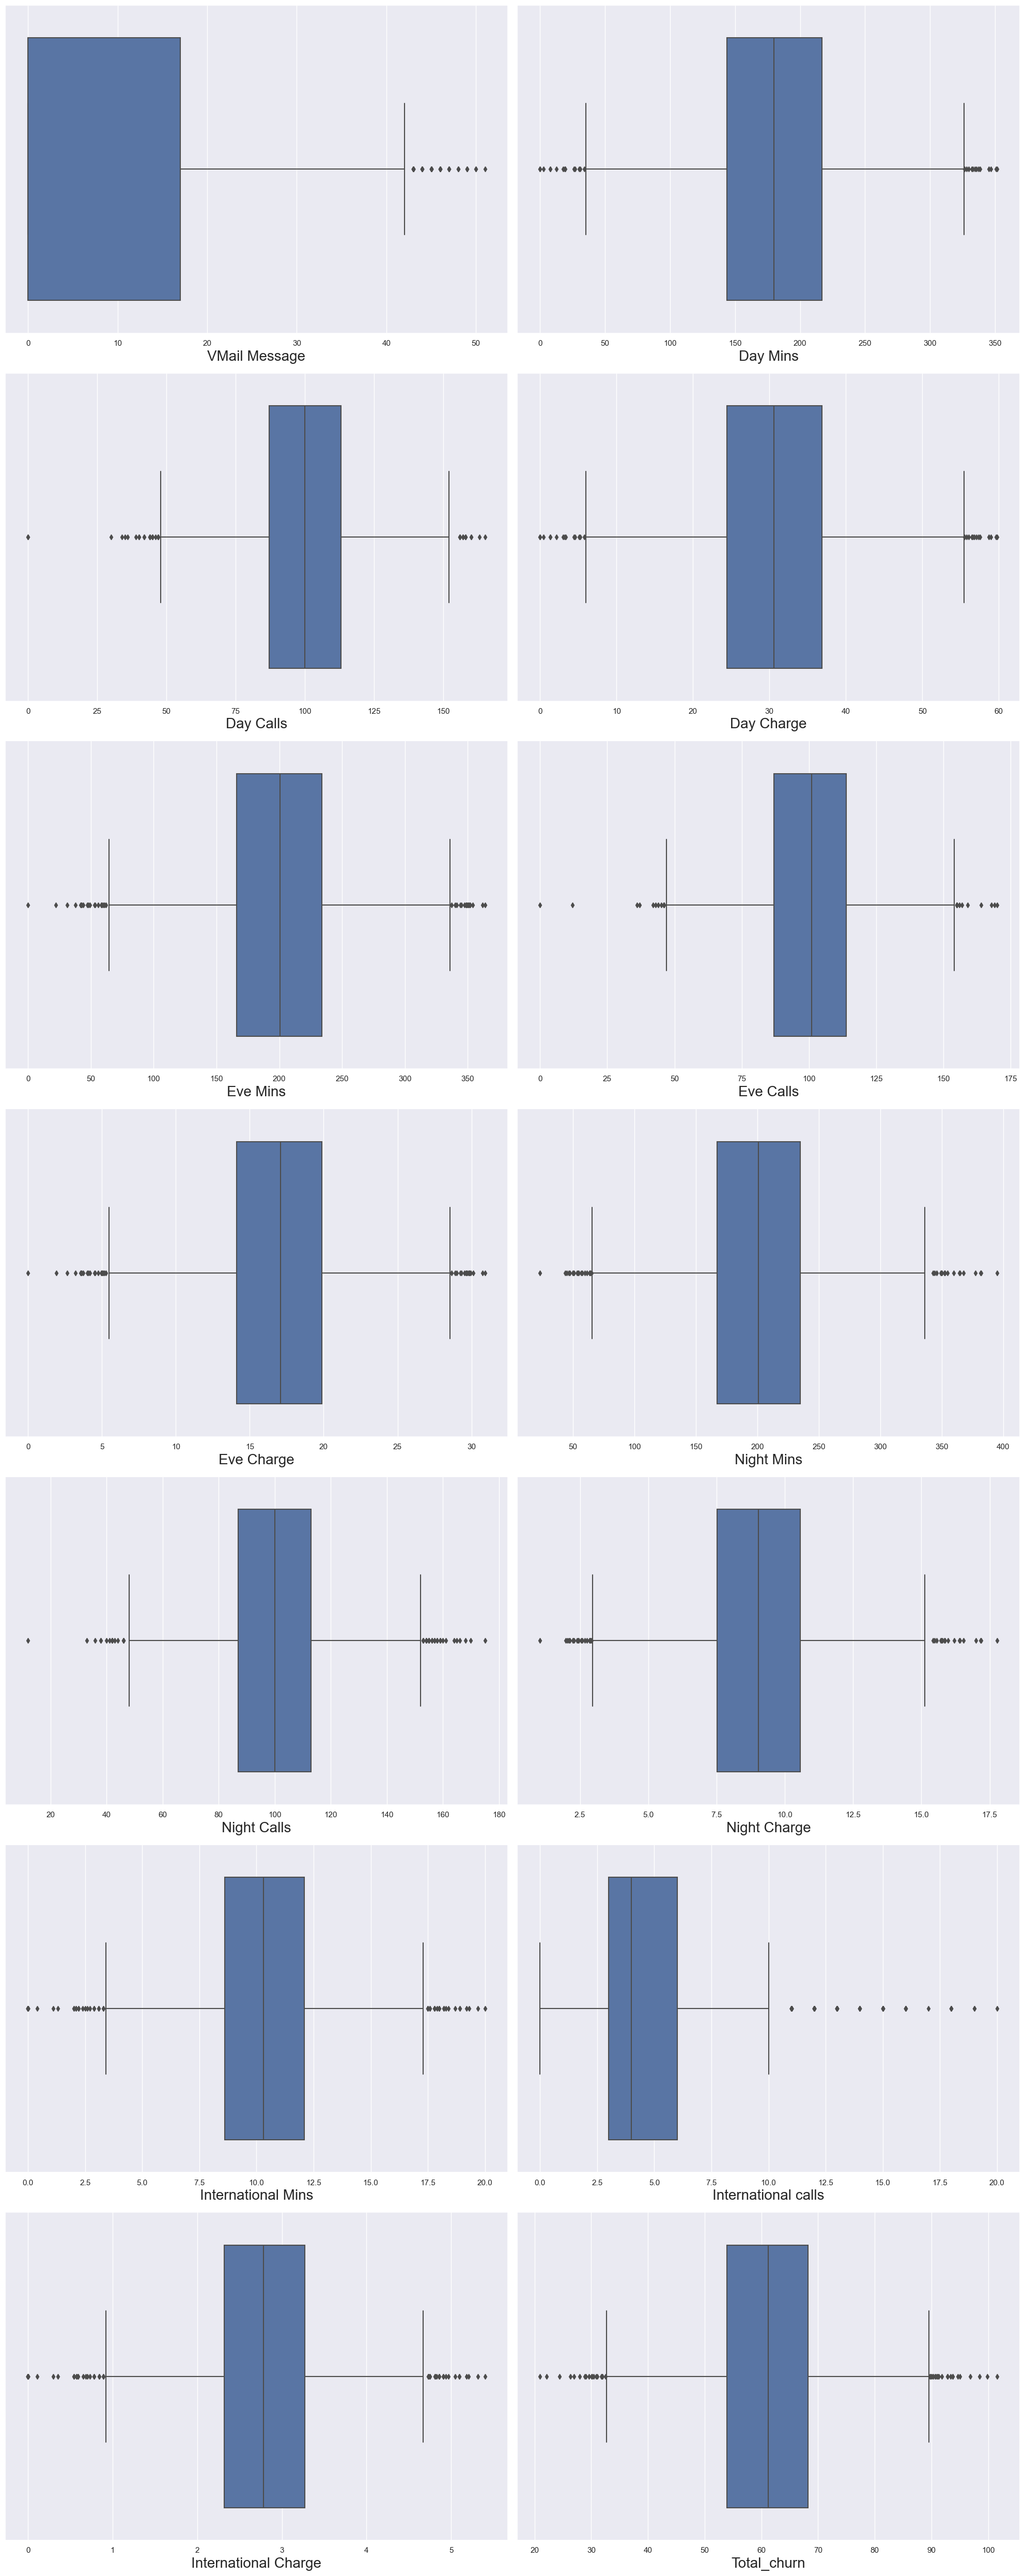

In [60]:
cols=data[['VMail Message', 'Day Mins', 
           'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'Total_churn','CustServ Calls']]

plt.figure(figsize=(20,50))
plotno = 1

for column in cols:
    if plotno<=14:   
        plt.subplot(7,2,plotno) 
        sns.boxplot(cols[column]) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1 
plt.tight_layout()
plt.show() 

### Imputing the outliers using IQR

In [61]:
from scipy import stats

#### VMail Message

In [62]:
iqr = stats.iqr(data['VMail Message'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['VMail Message'].quantile(0.25)
Q3 = data['VMail Message'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 17.0
Minimum limit: -25.5
Maximum Limit: 42.5


In [63]:
data.loc[data['VMail Message'] > max_limit,'VMail Message']=data['VMail Message'].median()

In [64]:
data.loc[data['VMail Message'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Day Mins

In [65]:
iqr = stats.iqr(data['Day Mins'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Day Mins'].quantile(0.25)
Q3 = data['Day Mins'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 73.10000000000002
Minimum limit: 34.049999999999955
Maximum Limit: 326.45000000000005


In [66]:
data.loc[data['Day Mins'] < min_limit,'Day Mins']=data['Day Mins'].median()
data.loc[data['Day Mins'] > max_limit,'Day Mins']=data['Day Mins'].median()

In [67]:
data.loc[data['Day Mins'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [68]:
data.loc[data['Day Mins'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Day Call

In [69]:
iqr = stats.iqr(data['Day Calls'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Day Calls'].quantile(0.25)
Q3 = data['Day Calls'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 26.0
Minimum limit: 48.0
Maximum Limit: 152.0


In [70]:
data.loc[data['Day Calls'] < min_limit,'Day Calls']=data['Day Calls'].median()
data.loc[data['Day Calls'] > max_limit,'Day Calls']=data['Day Calls'].median()

In [71]:
data.loc[data['Day Calls'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [72]:
data.loc[data['Day Calls'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Day Charge

In [73]:
iqr = stats.iqr(data['Day Charge'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Day Charge'].quantile(0.25)
Q3 = data['Day Charge'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 12.43
Minimum limit: 5.785
Maximum Limit: 55.504999999999995


In [74]:
data.loc[data['Day Charge'] < min_limit,'Day Charge']=data['Day Charge'].median()
data.loc[data['Day Charge'] > max_limit,'Day Charge']=data['Day Charge'].median()

In [75]:
data.loc[data['Day Charge'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [76]:
data.loc[data['Day Charge'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Eve Mins

In [77]:
iqr = stats.iqr(data['Eve Mins'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Eve Mins'].quantile(0.25)
Q3 = data['Eve Mins'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 68.1
Minimum limit: 63.750000000000014
Maximum Limit: 336.15


In [78]:
data.loc[data['Eve Mins'] < min_limit,'Eve Mins']=data['Eve Mins'].median()
data.loc[data['Eve Mins'] > max_limit,'Eve Mins']=data['Eve Mins'].median()

In [79]:
data.loc[data['Eve Mins']< min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [81]:
data.loc[data['Eve Mins']> max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Eve Calls

In [80]:
iqr = stats.iqr(data['Eve Calls'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Eve Calls'].quantile(0.25)
Q3 = data['Eve Calls'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 27.0
Minimum limit: 46.5
Maximum Limit: 154.5


In [81]:
data.loc[data['Eve Calls'] < min_limit,'Eve Calls']=data['Eve Calls'].median()
data.loc[data['Eve Calls'] > max_limit,'Eve Calls']=data['Eve Calls'].median()

In [82]:
data.loc[data['Eve Calls'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [83]:
data.loc[data['Eve Calls'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Eve Charge

In [84]:
iqr = stats.iqr(data['Eve Charge'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Eve Charge'].quantile(0.25)
Q3 = data['Eve Charge'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.790000000000001
Minimum limit: 5.414999999999997
Maximum Limit: 28.575000000000003


In [85]:
data.loc[data['Eve Charge'] < min_limit,'Eve Charge']=data['Eve Charge'].median()
data.loc[data['Eve Charge'] > max_limit,'Eve Charge']=data['Eve Charge'].median()

In [86]:
data.loc[data['Eve Charge'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [87]:
data.loc[data['Eve Charge'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Night Mins

In [88]:
iqr = stats.iqr(data['Night Mins'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Night Mins'].quantile(0.25)
Q3 = data['Night Mins'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 67.80000000000001
Minimum limit: 65.39999999999998
Maximum Limit: 336.6


In [89]:
data.loc[data['Night Mins'] < min_limit,'Night Mins']=data['Night Mins'].median()
data.loc[data['Night Mins'] > max_limit,'Night Mins']=data['Night Mins'].median()

In [90]:
data.loc[data ['Night Mins'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [91]:
data.loc[data['Night Mins'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Night Calls

In [92]:
iqr = stats.iqr(data['Night Calls'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Night Calls'].quantile(0.25)
Q3 = data['Night Calls'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 26.0
Minimum limit: 48.0
Maximum Limit: 152.0


In [93]:
data.loc[data['Night Calls'] < min_limit,'Night Calls']=data['Night Calls'].median()
data.loc[data['Night Calls'] > max_limit,'Night Calls']=data['Night Calls'].median()

In [94]:
data.loc[data['Night Calls'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [95]:
data.loc[data['Night Calls'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Night Charge

In [96]:
iqr = stats.iqr(data['Night Charge'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Night Charge'].quantile(0.25)
Q3 = data['Night Charge'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 3.0500000000000007
Minimum limit: 2.9449999999999985
Maximum Limit: 15.145000000000001


In [97]:
data.loc[data['Night Charge'] < min_limit,'Night Charge']=data['Night Charge'].median()
data.loc[data['Night Charge'] > max_limit,'Night Charge']=data['Night Charge'].median()

In [98]:
data.loc[data['Night Charge'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [99]:
data.loc[data['Night Charge'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Interntaional Mins

In [100]:
iqr = stats.iqr(data['International Mins'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['International Mins'].quantile(0.25)
Q3 = data['International Mins'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 3.5
Minimum limit: 3.3499999999999996
Maximum Limit: 17.35


In [101]:
data.loc[data['International Mins'] < min_limit,'International Mins']=data['International Mins'].median()
data.loc[data['International Mins'] > max_limit,'International Mins']=data['International Mins'].median()

In [102]:
data.loc[data['International Mins'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [103]:
data.loc[data['International Mins'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### International Call

In [104]:
iqr = stats.iqr(data['International calls'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['International calls'].quantile(0.25)
Q3 = data['International calls'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 3.0
Minimum limit: -1.5
Maximum Limit: 10.5


In [105]:
data.loc[data['International calls'] < min_limit,'International calls']=data['International calls'].median()
data.loc[data['International calls'] > max_limit,'International calls']=data['International calls'].median()

In [106]:
data.loc[data['International calls'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [107]:
data.loc[data['International calls'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### International Charge

In [108]:
iqr = stats.iqr(data['International Charge'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['International Charge'].quantile(0.25)
Q3 = data['International Charge'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 0.9500000000000002
Minimum limit: 0.8949999999999996
Maximum Limit: 4.695


In [109]:
data.loc[data['International Charge'] < min_limit,'International Charge']=data['International Charge'].median()
data.loc[data['International Charge'] > max_limit,'International Charge']=data['International Charge'].median()

In [110]:
data.loc[data['International Charge'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [111]:
data.loc[data['International Charge'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### CustServ Calls

In [112]:
iqr = stats.iqr(data['CustServ Calls'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['CustServ Calls'].quantile(0.25)
Q3 = data['CustServ Calls'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: -0.5
Maximum Limit: 3.5


In [113]:
data.loc[data['CustServ Calls'] < min_limit,'CustServ Calls']=data['CustServ Calls'].median()
data.loc[data['CustServ Calls'] > max_limit,'CustServ Calls']=data['CustServ Calls'].median()

In [114]:
data.loc[data['CustServ Calls'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [115]:
data.loc[data['CustServ Calls'] > max_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

#### Total churn

In [116]:
iqr = stats.iqr(data['Total_churn'],interpolation='midpoint')
print("IQR:",iqr)


Q1 = data['Total_churn'].quantile(0.25)
Q3 = data['Total_churn'].quantile(0.75)


min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 14.280000000000001
Minimum limit: 32.53
Maximum Limit: 89.65


In [117]:
data.loc[data['Total_churn'] < min_limit,'Total_churn']=data['Total_churn'].median()
data.loc[data['Total_churn'] > max_limit,'Total_churn']=data['Total_churn'].median()

In [118]:
data.loc[data['Total_churn'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

In [119]:
data.loc[data['Total_churn'] < min_limit]

Empty DataFrame
Columns: [State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, Churn, Total_churn]
Index: []

[0 rows x 22 columns]

### Checking after imputations

<AxesSubplot:xlabel='Total_churn'>

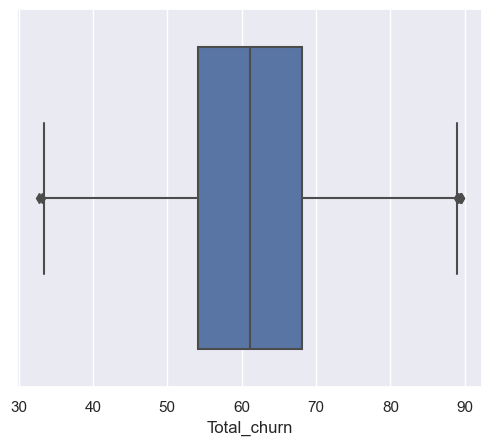

In [120]:
plt.figure(figsize=(6,5))
sns.boxplot(x=data.Total_churn,data=data)

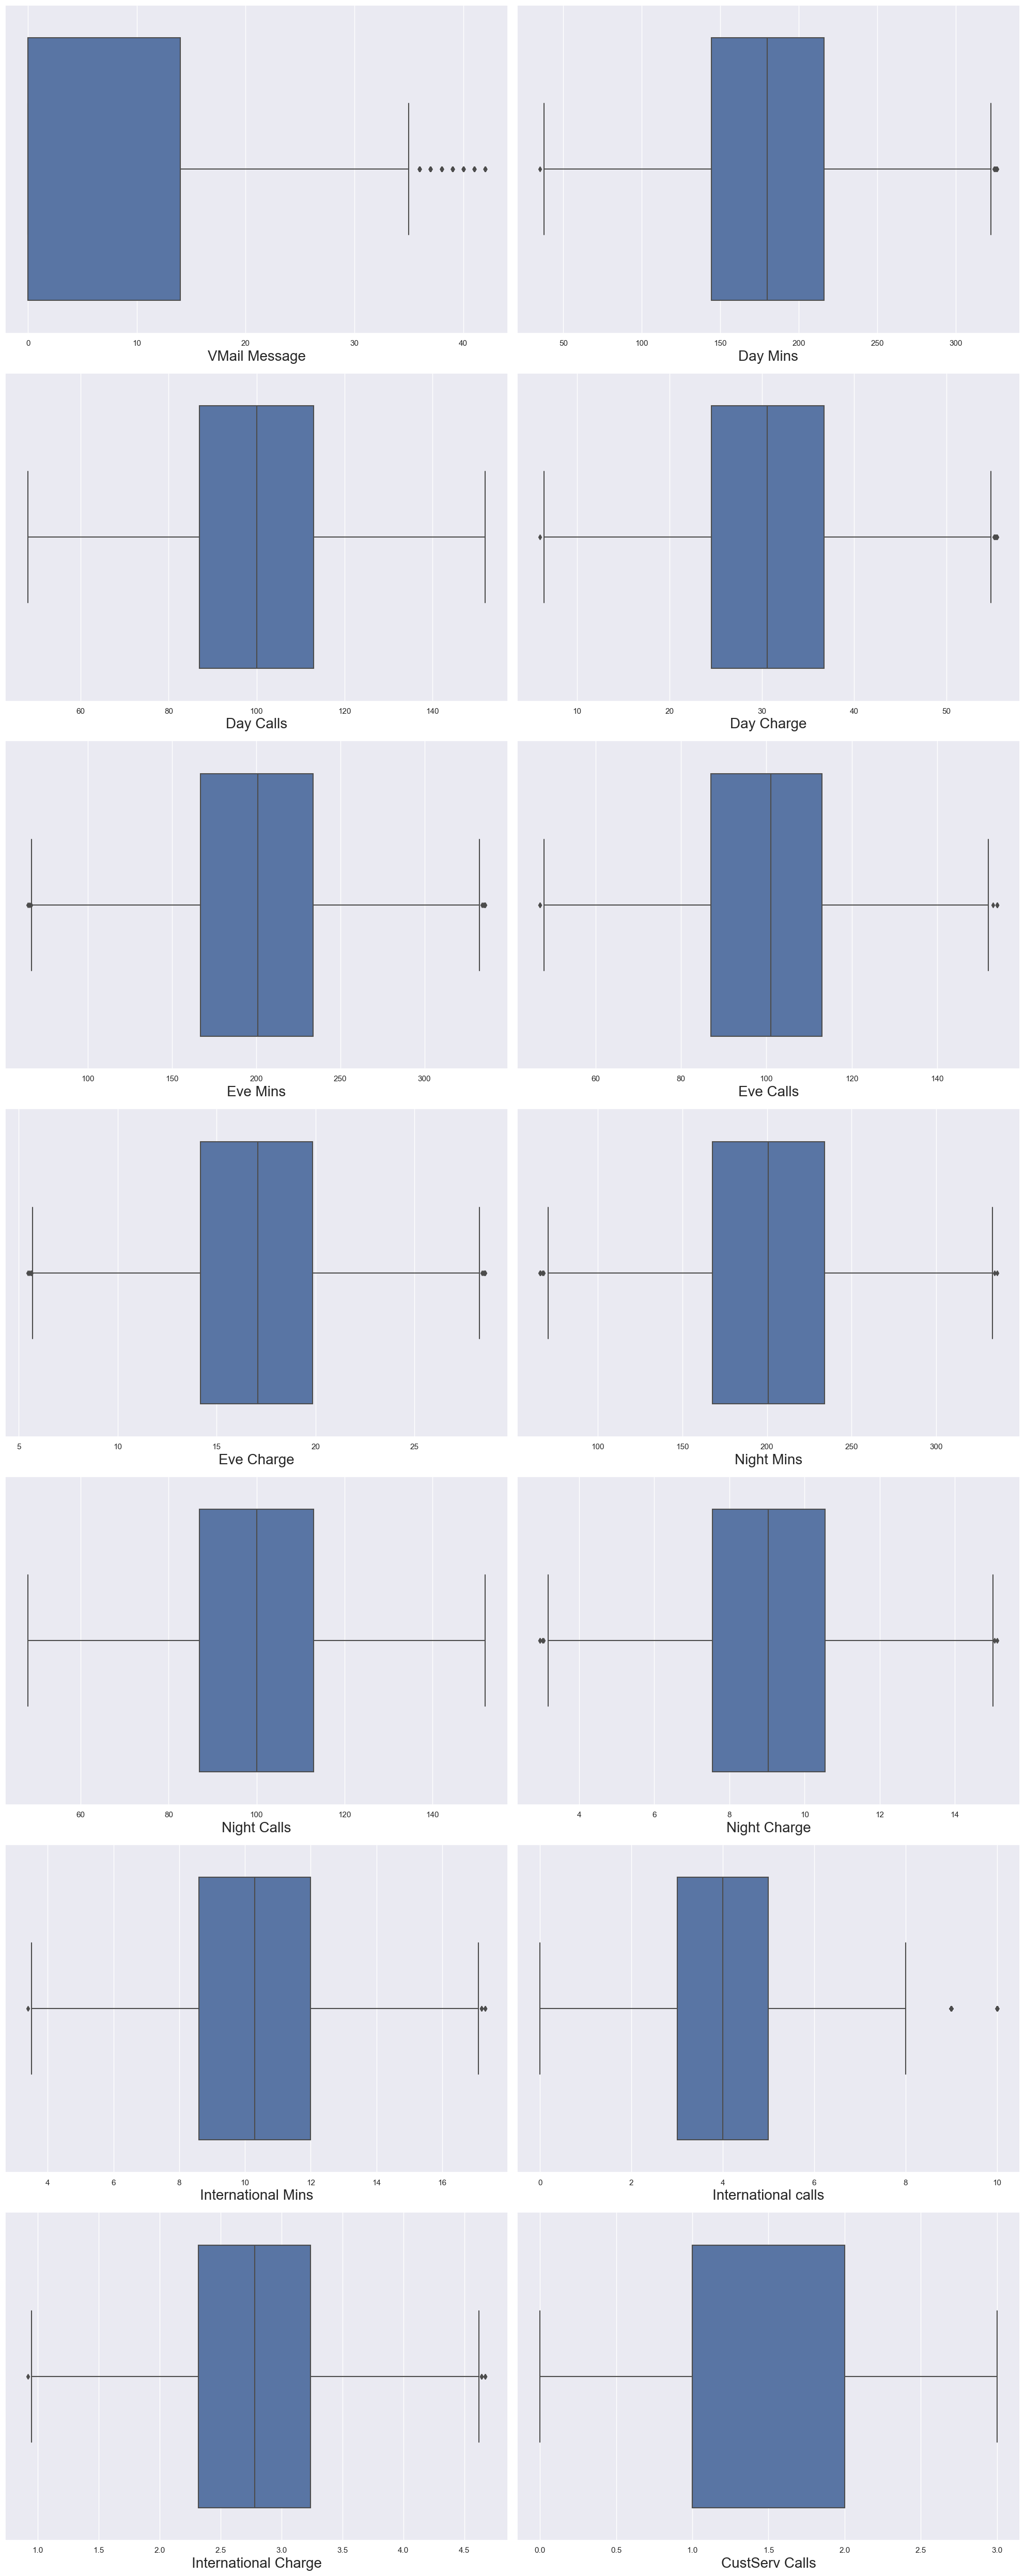

In [121]:
cols=data[['VMail Message', 'Day Mins', 
           'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls']]

plt.figure(figsize=(20,50))
plotno = 1

for column in cols:
    if plotno<=14:   
        plt.subplot(7,2,plotno) 
        sns.boxplot(cols[column]) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1 
plt.tight_layout()
plt.show() 
    

### Feature Transformation

In [122]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

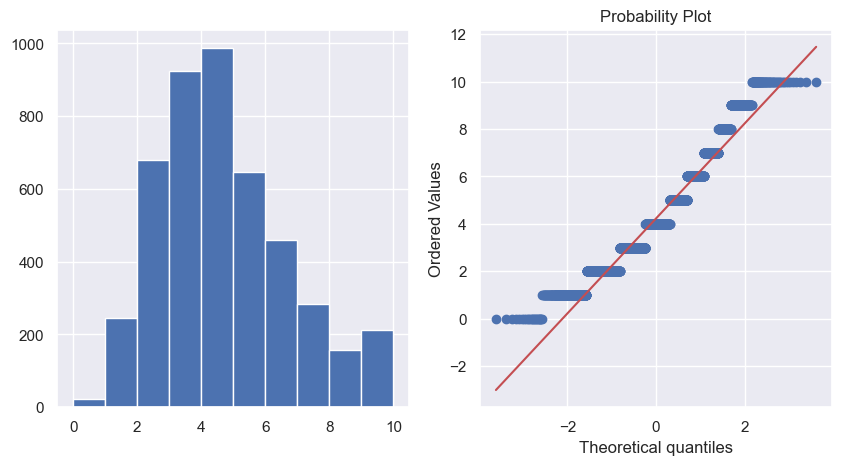

In [123]:
plot_data(data,'International calls')

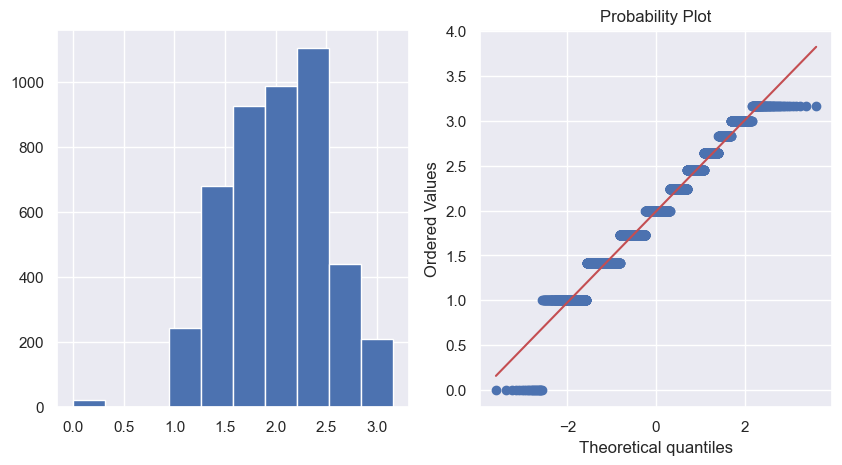

In [124]:
data['square_International calls'] = data['International calls']**(1/2)
plot_data(data,'square_International calls')

### Scaling the data

In [125]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler() 

data[['Day Mins', 'Day Calls', 'Day Charge','Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins','International Charge','square_International calls','Total_churn']]=scalar.fit_transform(data[['Day Mins', 'Day Calls', 'Day Charge','Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins','International Charge','square_International calls','Total_churn']])

In [126]:
data

State  Account Length  Area Code      Phone  International Plan  \
0       KS             128        415   382-4657                   0   
1       OH             107        415   371-7191                   0   
2       NJ             137        415   358-1921                   0   
3       OH              84        408   375-9999                   1   
4       OK              75        415   330-6626                   1   
...    ...             ...        ...        ...                 ...   
4612    NY              57        510   345-7512                   0   
4613    NM             177        408   343-6820                   0   
4614    VT              67        408   338-4794                   0   
4615    MI              98        415   355-8388                   0   
4616    IN             140        415   409-6884                   0   

      VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  ...  \
0              1             25  1.609731   0.511593    1.610020  ...   
1              1             26 -0.359581   1.190052   -0.359870  ...   
2              0              0  1.196841   0.720350    1.197014  ...   
3              0              0  2.262363  -1.523782    2.262546  ...   
4              0              0 -0.262542   0.668161   -0.262495  ...   
...          ...            ...       ...        ...         ...  ...   
4612           1             25 -0.694459  -1.001891   -0.694527  ...   
4613           1             29  0.161763  -0.480000    0.161703  ...   
4614           1             33 -1.008407   1.346619   -1.007919  ...   
4615           1             23 -0.220683  -0.114676   -0.221082  ...   
4616           0              0  0.460490  -0.010298    0.460544  ...   

      Night Mins  Night Calls  Night Charge  International Mins  \
0       0.905211    -0.461999      0.904454            -0.12704   
1       1.104506     0.166385      1.105346             1.32558   
2      -0.781613     0.218750     -0.780301             0.73668   
3      -0.076886    -0.566730     -0.077178            -1.46188   
4      -0.282346     1.108961     -0.282636            -0.08778   
...          ...          ...           ...                 ...   
4612   -0.863797     1.161327     -0.862484            -0.71594   
4613   -0.761067     0.847135     -0.762038             2.11078   
4614    0.005297    -0.461999      0.005005             1.05076   
4615   -0.722030    -0.200172     -0.720946             1.56114   
4616    0.044335     0.794769      0.046096             0.69742   

      International calls  International Charge  CustServ Calls  Churn  \
0                       3             -0.127784               1      0   
1                       3              1.326473               1      0   
2                       5              0.730228               0      0   
3                       7             -1.465700               2      0   
4                       3             -0.084156               3      0   
...                   ...                   ...             ...    ...   
4612                    6             -0.709486               3      0   
4613                    1              2.111771               3      0   
4614                    3              1.050164               1      0   
4615                    3              1.559154               0      0   
4616                    4              0.701142               2      0   

      Total_churn  square_International calls  
0        1.443233                   -0.501681  
1       -0.256749                   -0.501681  
2        0.279157                    0.476447  
3        1.066332                    1.271504  
4       -0.863325                   -0.501681  
...           ...                         ...  
4612    -0.748488                    0.890627  
4613     0.499998                   -1.922345  
4614    -0.222396                   -0.501681  
4615    -0.270491                   -0.501681  
4616    -0.240064                    0.01

In [127]:
data.head()

State  Account Length  Area Code      Phone  International Plan  VMail Plan  \
0    KS             128        415   382-4657                   0           1   
1    OH             107        415   371-7191                   0           1   
2    NJ             137        415   358-1921                   0           0   
3    OH              84        408   375-9999                   1           0   
4    OK              75        415   330-6626                   1           0   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Night Mins  \
0             25  1.609731   0.511593    1.610020  ...    0.905211   
1             26 -0.359581   1.190052   -0.359870  ...    1.104506   
2              0  1.196841   0.720350    1.197014  ...   -0.781613   
3              0  2.262363  -1.523782    2.262546  ...   -0.076886   
4              0 -0.262542   0.668161   -0.262495  ...   -0.282346   

   Night Calls  Night Charge  International Mins  International calls  \
0    -0.461999      0.904454            -0.12704                    3   
1     0.166385      1.105346             1.32558                    3   
2     0.218750     -0.780301             0.73668                    5   
3    -0.566730     -0.077178            -1.46188                    7   
4     1.108961     -0.282636            -0.08778                    3   

   International Charge  CustServ Calls  Churn  Total_churn  \
0             -0.127784               1      0     1.443233   
1              1.326473               1      0    -0.256749   
2              0.730228               0      0     0.279157   
3             -1.465700               2      0     1.066332   
4             -0.084156               3      0    -0.863325   

   square_International calls  
0                   -0.501681  
1                   -0.501681  
2                    0.476447  
3                    1.271504  
4                   -0.501681  

[5 rows x 23 columns]

#### correaltion between columns

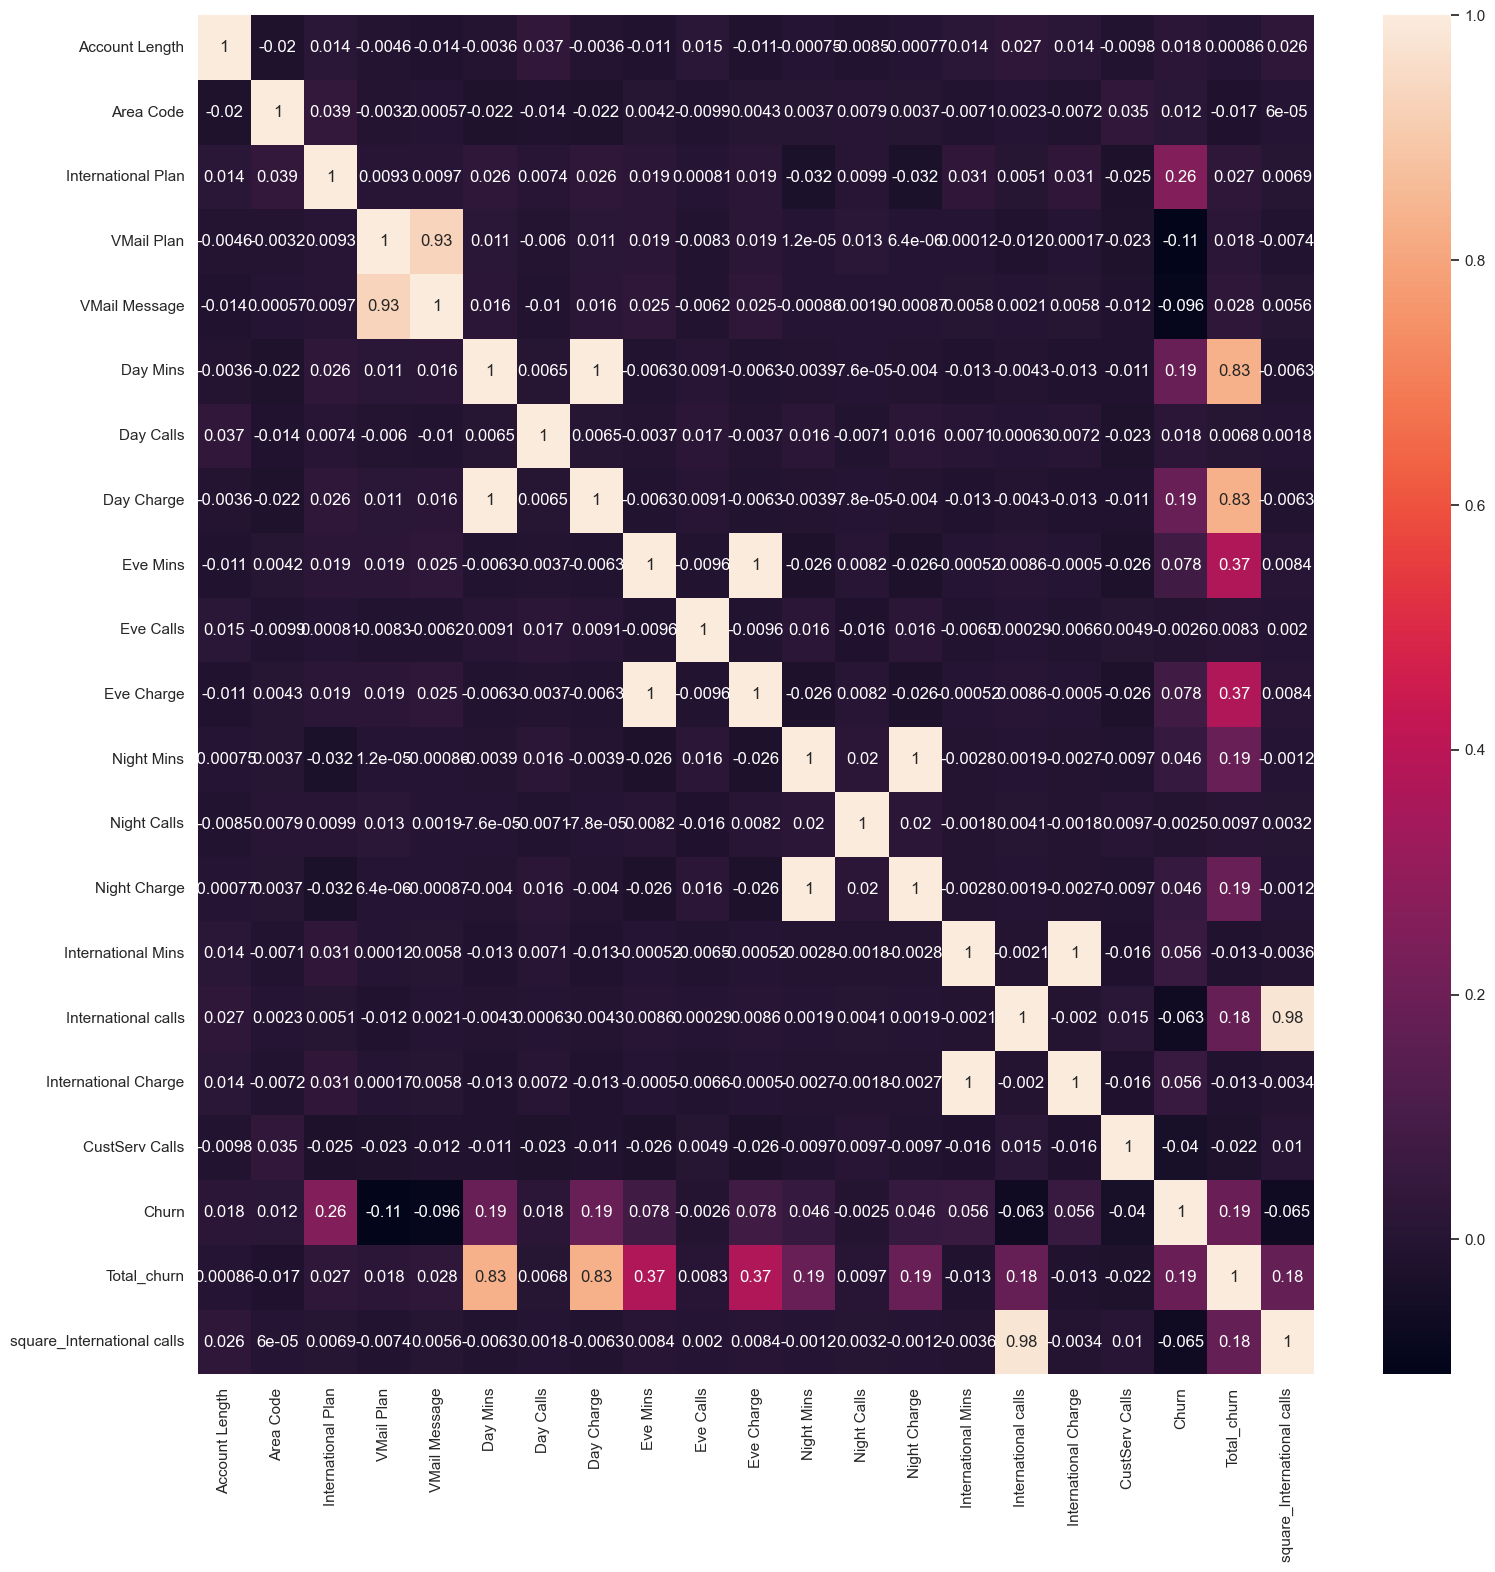

In [128]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [129]:
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                    feature2      corr
0                   Day Charge                    Day Mins  1.000000
1                     Day Mins                  Day Charge  1.000000
2                     Eve Mins                  Eve Charge  1.000000
3                   Eve Charge                    Eve Mins  1.000000
4                   Night Mins                Night Charge  0.999999
5                 Night Charge                  Night Mins  0.999999
6         International Charge          International Mins  0.999991
7           International Mins        International Charge  0.999991
8   square_International calls         International calls  0.979976
9          International calls  square_International calls  0.979976
10                  VMail Plan               VMail Message  0.933469
11               VMail Message                  VMail Plan  0.933469

### Dropping unique, constants and highly related columns

In [130]:
data.drop(['State', 'Account Length', 'Area Code', 'Phone', 'VMail Message',  'Day Charge', 'Eve Charge', 
       'Night Charge', 'International calls','International Charge' ],axis=1,inplace=True)

In [131]:
data

International Plan  VMail Plan  Day Mins  Day Calls  Eve Mins  \
0                      0           1  1.609731   0.511593 -0.065339   
1                      0           1 -0.359581   1.190052 -0.104328   
2                      0           0  1.196841   0.720350 -1.628983   
3                      1           0  2.262363  -1.523782  0.004429   
4                      1           0 -0.262542   0.668161 -1.072884   
5                      1           0  0.816298  -0.114676  0.410730   
6                      0           1  0.717357  -0.636567  0.004429   
7                      1           0 -0.447106  -1.106269 -2.000399   
8                      0           0  0.076141  -0.166865  0.004429   
9                      1           1  1.486054  -0.845323  0.439459   
10                     0           0 -0.977964   1.920699  0.572840   
11                     0           0  0.137028   1.398808 -0.763028   
12                     0           0 -0.983672  -0.219054 -1.963463   
13                     0           0 -0.454717  -0.636567  0.964777   
14                     0           0 -1.137792  -1.575971  2.187784   
15                     0           0 -0.009481  -1.732538  2.405299   
16                     0           1  0.302565   2.025077  1.648102   
17                     0           0  0.194110   0.720350  0.361482   
18                     0           1  0.175083  -1.784727  0.250672   
19                     0           0  0.835325  -0.532189 -0.843057   
20                     0           0 -0.483258   0.876917  0.802667   
21                     0           0 -2.247076  -0.584378 -0.629646   
22                     0           0  0.047600   0.615972 -2.620111   
23                     0           0 -1.333772   0.146270 -1.298607   
24                     0           0 -1.891268  -0.740945  0.915529   
25                     0           0 -1.069294  -1.262836  1.570125   
26                     0           1  0.618416   0.772539 -0.194617   
27                     0           0 -0.879023  -1.419403 -0.925138   
28                     0           0  0.180791   0.459404  1.182292   
29                     0           0 -1.164430   0.876917  0.297869   
30                     0           0 -1.820867  -0.271243 -1.310919   
31                     0           0  0.867671   0.250648  0.018794   
32                     0           0  0.599388   1.085673  0.004429   
33                     0           0  1.314810   0.929106  1.063274   
34                     0           1 -0.070368  -0.323432 -0.114588   
35                     0           1  0.751606  -1.054080  0.343014   
36                     0           1 -0.650697   1.450997 -0.781496   
37                     0           0 -0.945618  -1.889105  0.474343   
38                     1           1  0.445268   0.302837 -0.266438   
39                     0           0 -0.762957  -0.323432  1.461367   
40                     0           0 -1.031240   0.094081 -0.693259   
41                     1           1 -0.140768  -0.793134  0.068042   
42                     0           0 -1.059781  -0.949701  1.674778   
43                     0           0 -1.801840  -1.210647 -0.724040   
44                     0           0 -0.504187  -1.732538  0.517436   
45                     0           1 -1.133987  -0.166865  0.254776   
46                     0           0  0.586069   1.033484 -0.779444   
47                     0           0  0.123709   1.711943 -1.354011   
48                     0           0 -0.407149   0.720350  0.630297   
49                     0           1 -0.899953   1.816321  0.340962   
50                     0           0  0.216942   0.407215  1.420327   
51                     0           0  0.763022  -2.254429  0.215788   
52                     0           0  0.106585   0.615972 -0.213085   
53                     0           0 -0.386219   0.876917  1.373130   
54                     0           0 -0.561269  -0.897512  0.392262   
55                     0      

### PCA 

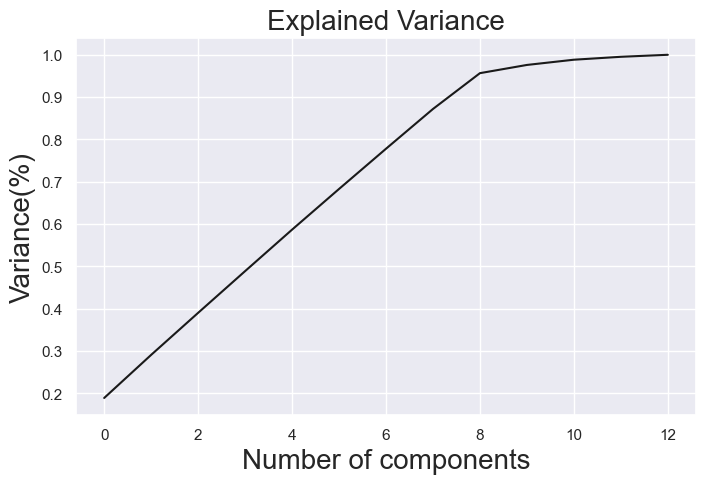

In [132]:
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

In [133]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(data)
new_data

array([[ 2.06576635, -0.9912138 , -0.18439513, ..., -0.45617437,
        -0.09789114,  0.77281395],
       [-0.35483248, -1.13971076,  0.0424604 , ..., -0.20255912,
         0.13268614,  0.76081515],
       [ 0.48834722, -1.02900701, -0.5994578 , ...,  1.51305064,
        -1.48332901, -0.21697352],
       ...,
       [-0.30676497, -0.25137409, -1.53458747, ..., -0.04286727,
         0.37779495,  0.75312272],
       [-0.33871832,  0.2750441 , -1.2425482 , ...,  0.45717799,
        -1.04950505,  0.74483763],
       [-0.31147278, -0.89482315,  0.65028777, ...,  1.15350923,
         0.41351271, -0.21098307]])

In [134]:
df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])


df['Churn']=data.Churn

df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  2.065766 -0.991214 -0.184395 -0.112334  0.762027  0.116612 -0.405713   
1 -0.354832 -1.139711  0.042460  1.750846  0.632865  0.000906  0.099963   
2  0.488347 -1.029007 -0.599458  0.134758  0.338243 -1.149810 -0.627274   
3  2.291621  0.758648  0.409901 -2.265536 -0.644166 -0.951023 -0.503694   
4 -1.178743 -1.130470  0.527427 -0.410960  0.022977  0.222886  0.246525   

       pca8      pca9     pca10  Churn  
0 -0.456174 -0.097891  0.772814      0  
1 -0.202559  0.132686  0.760815      0  
2  1.513051 -1.483329 -0.216974      0  
3 -0.396049  0.180773 -0.261600      0  
4  1.701540  1.442302 -0.251912      0

### Model Building

In [135]:
X = df.iloc[:,:-1]
y = df.Churn

In [136]:
X.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  2.065766 -0.991214 -0.184395 -0.112334  0.762027  0.116612 -0.405713   
1 -0.354832 -1.139711  0.042460  1.750846  0.632865  0.000906  0.099963   
2  0.488347 -1.029007 -0.599458  0.134758  0.338243 -1.149810 -0.627274   
3  2.291621  0.758648  0.409901 -2.265536 -0.644166 -0.951023 -0.503694   
4 -1.178743 -1.130470  0.527427 -0.410960  0.022977  0.222886  0.246525   

       pca8      pca9     pca10  
0 -0.456174 -0.097891  0.772814  
1 -0.202559  0.132686  0.760815  
2  1.513051 -1.483329 -0.216974  
3 -0.396049  0.180773 -0.261600  
4  1.701540  1.442302 -0.251912

In [137]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

#### Data Balancing

In [138]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE() 
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({0: 3961, 1: 656})
balanced data:    : Counter({0: 3961, 1: 3961})


In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6337, 10), (1585, 10), (6337,), (1585,))

In [141]:
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 88.1489663878807
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      3269
           1       0.86      0.90      0.88      3068

    accuracy                           0.88      6337
   macro avg       0.88      0.88      0.88      6337
weighted avg       0.88      0.88      0.88      6337



In [143]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 85.74132492113564
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       849
           1       0.84      0.86      0.85       736

    accuracy                           0.86      1585
   macro avg       0.86      0.86      0.86      1585
weighted avg       0.86      0.86      0.86      1585



### Random Forest classifier 

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

In [145]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3136
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



In [146]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 99.43217665615141
Classification report of testing: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       832
           1       0.99      1.00      0.99       753

    accuracy                           0.99      1585
   macro avg       0.99      0.99      0.99      1585
weighted avg       0.99      0.99      0.99      1585

